# Fabp2

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ranksums, mannwhitneyu

In [2]:
gene = 'Fabp2'

In [3]:
manual = pd.read_csv(gene + '_manual_annotation.csv')
pd.set_option('display.max_columns', None)
manual

,mouse_id,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual
0,30511864,C57BL/6N,f,control,wt (Gstp1),22.3,88.02,55.89,2.45,1.08
1,30511866,C57BL/6N,f,control,wt (Gstp1),22.3,92.14,62.24,2.41,0.85
2,30511887,C57BL/6N,m,control,wt (Gstp1),22.7,49.89,24.89,4.00,2.97
3,30511905,C57BL/6N,m,control,wt (Gstp1),28.5,91.90,62.81,2.70,1.01
4,30511908,C57BL/6N,f,control,wt (Gstp1),20.3,93.85,66.23,2.87,0.94
5,30511918,C57BL/6N,f,control,wt (Gstp1),22.2,80.67,48.20,3.34,1.74
6,30511943,C57BL/6N,m,control,wt (Gstp1),27.4,79.13,46.46,3.10,1.68
7,30511950,C57BL/6N,m,control,wt (Kansl1l),24.9,84.92,52.15,2.54,1.36
8,30511955,C57BL/6N,f,control,wt (Kansl1l),21.9,92.65,63.41,2.56,0.95
9,30511979,C57BL/6N,m,control,wt (Kansl1l),27.9,88.10,56.82,3.01,1.31


In [4]:
filtered_data = pd.read_csv(gene + '_data_filtered_plus_functional_parameter_plus_manual_measurements.csv')
filtered_data

,mouse_id,file,LVIDd_auto,LVIDd_auto_time,LVIDs_auto,LVIDs_auto_time,heart_rate_auto,heart_rate_auto_time,LVIDd_auto_quality_label,LVIDd_auto_quality_flag,LVIDs_auto_quality_label,LVIDs_auto_quality_flag,LV_Vold_auto,LV_Vols_auto,EF_auto,FS_auto,strain,sex,genotype,type,bw,EF_manual,FS_manual,LVIDd_manual,LVIDs_manual,dif_LVIDd,mean_LVIDd,dif_LVIDs,mean_LVIDs,dif_EF,dif_FS
0,30516926,30516926_2.dcm,2.043314,3.209167,1.362209,3.078333,757.894737,3.209167,0.999378,high,0.999378,high,13.439909,4.703126,65.006267,33.333333,C57BL/6N,m,control,wt (Bsph2),27.8,88.96,57.93,2.68,1.26,-0.636686,2.361657,0.102209,1.311105,-23.953733,-24.596667
1,30516926,30516926_2.dcm,2.765698,3.957500,1.093895,3.920833,699.029126,3.957500,0.764704,high,0.764704,high,28.667061,2.622500,90.851870,60.447761,C57BL/6N,m,control,wt (Bsph2),27.8,88.96,57.93,2.68,1.26,0.085698,2.722849,-0.166105,1.176948,1.891870,2.517761
2,30516926,30516926_2.dcm,2.435465,4.043333,0.660465,3.999167,712.871287,4.043333,0.764704,high,0.764704,high,20.912479,0.658962,96.848954,72.881356,C57BL/6N,m,control,wt (Bsph2),27.8,88.96,57.93,2.68,1.26,-0.244535,2.557733,-0.599535,0.960233,7.888954,14.951356
3,30516926,30516926_2.dcm,2.662500,4.127500,0.660465,4.085833,742.268041,4.127500,0.964613,high,0.964613,high,26.097677,0.658962,97.475017,75.193798,C57BL/6N,m,control,wt (Bsph2),27.8,88.96,57.93,2.68,1.26,-0.017500,2.671250,-0.599535,0.960233,8.515017,17.263798
4,30516926,30516926_2.dcm,2.621221,4.208333,0.928779,4.167500,626.086957,4.208333,0.964613,high,0.964613,high,25.107276,1.684808,93.289564,64.566929,C57BL/6N,m,control,wt (Bsph2),27.8,88.96,57.93,2.68,1.26,-0.058779,2.650610,-0.331221,1.094390,4.329564,6.636929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,30511979,Kansl1l_1v1_58.dcm,2.786337,4.358333,1.382849,4.299167,626.086957,4.358333,0.999191,high,0.999191,high,29.197006,4.893315,83.240353,50.370370,C57BL/6N,m,control,wt (Kansl1l),27.9,88.10,56.82,3.01,1.31,-0.223663,2.898169,0.072849,1.346424,-4.859647,-6.449630
7201,30511979,Kansl1l_1v1_58.dcm,2.745058,4.454167,0.990698,4.394167,774.193548,4.454167,0.995820,high,0.995820,high,28.142482,2.007393,92.867036,63.909774,C57BL/6N,m,control,wt (Kansl1l),27.9,88.10,56.82,3.01,1.31,-0.264942,2.877529,-0.319302,1.150349,4.767036,7.089774
7202,30511979,Kansl1l_1v1_58.dcm,3.054651,4.531667,1.176453,4.485000,642.857143,4.531667,0.995820,high,0.995820,high,36.577660,3.186910,91.287279,61.486486,C57BL/6N,m,control,wt (Kansl1l),27.9,88.10,56.82,3.01,1.31,0.044651,3.032326,-0.133547,1.243227,3.187279,4.666486
7203,30511979,Kansl1l_1v1_58.dcm,2.745058,4.625000,1.197093,4.575000,610.169492,4.625000,0.995820,high,0.995820,high,28.142482,3.338336,88.137734,56.390977,C57BL/6N,m,control,wt (Kansl1l),27.9,88.10,56.82,3.01,1.31,-0.264942,2.877529,-0.112907,1.253547,0.037734,-0.429023


In [5]:
filtered_data[['LVIDd_auto', 'LVIDs_auto', 'EF_auto', 'FS_auto', 'genotype', 'sex']].groupby(by=['sex','genotype']).agg(['mean', 'std']).round(2).to_latex()

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n  &        & \\multicolumn{2}{l}{LVIDd\\_auto} & \\multicolumn{2}{l}{LVIDs\\_auto} & \\multicolumn{2}{l}{EF\\_auto} & \\multicolumn{2}{l}{FS\\_auto} \\\\\n  &        &       mean &   std &       mean &   std &    mean &    std &    mean &    std \\\\\nsex & genotype &            &       &            &       &         &        &         &        \\\\\n\\midrule\nf & control &       2.65 &  0.28 &       0.99 &  0.30 &   90.49 &   9.89 &   62.35 &  11.10 \\\\\n  & mutant &       2.77 &  0.31 &       1.12 &  0.34 &   87.94 &  12.58 &   59.27 &  12.73 \\\\\nm & control &       2.72 &  0.29 &       1.07 &  0.27 &   90.09 &   7.36 &   60.77 &   8.78 \\\\\n  & mutant &       2.87 &  0.31 &       1.24 &  0.37 &   86.96 &   9.52 &   56.91 &  10.37 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [6]:
mice_manual = np.unique(manual['mouse_id'])
mice_automatic = np.unique(filtered_data['mouse_id'])
mice_manual==mice_automatic

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Differences between automatic and manual measurements

In [7]:
sns.set_style("whitegrid")
colors1="Spectral"
colors2="tab:red"

### Overview per line

<AxesSubplot:xlabel='mouse_id', ylabel='LVIDs_manual'>

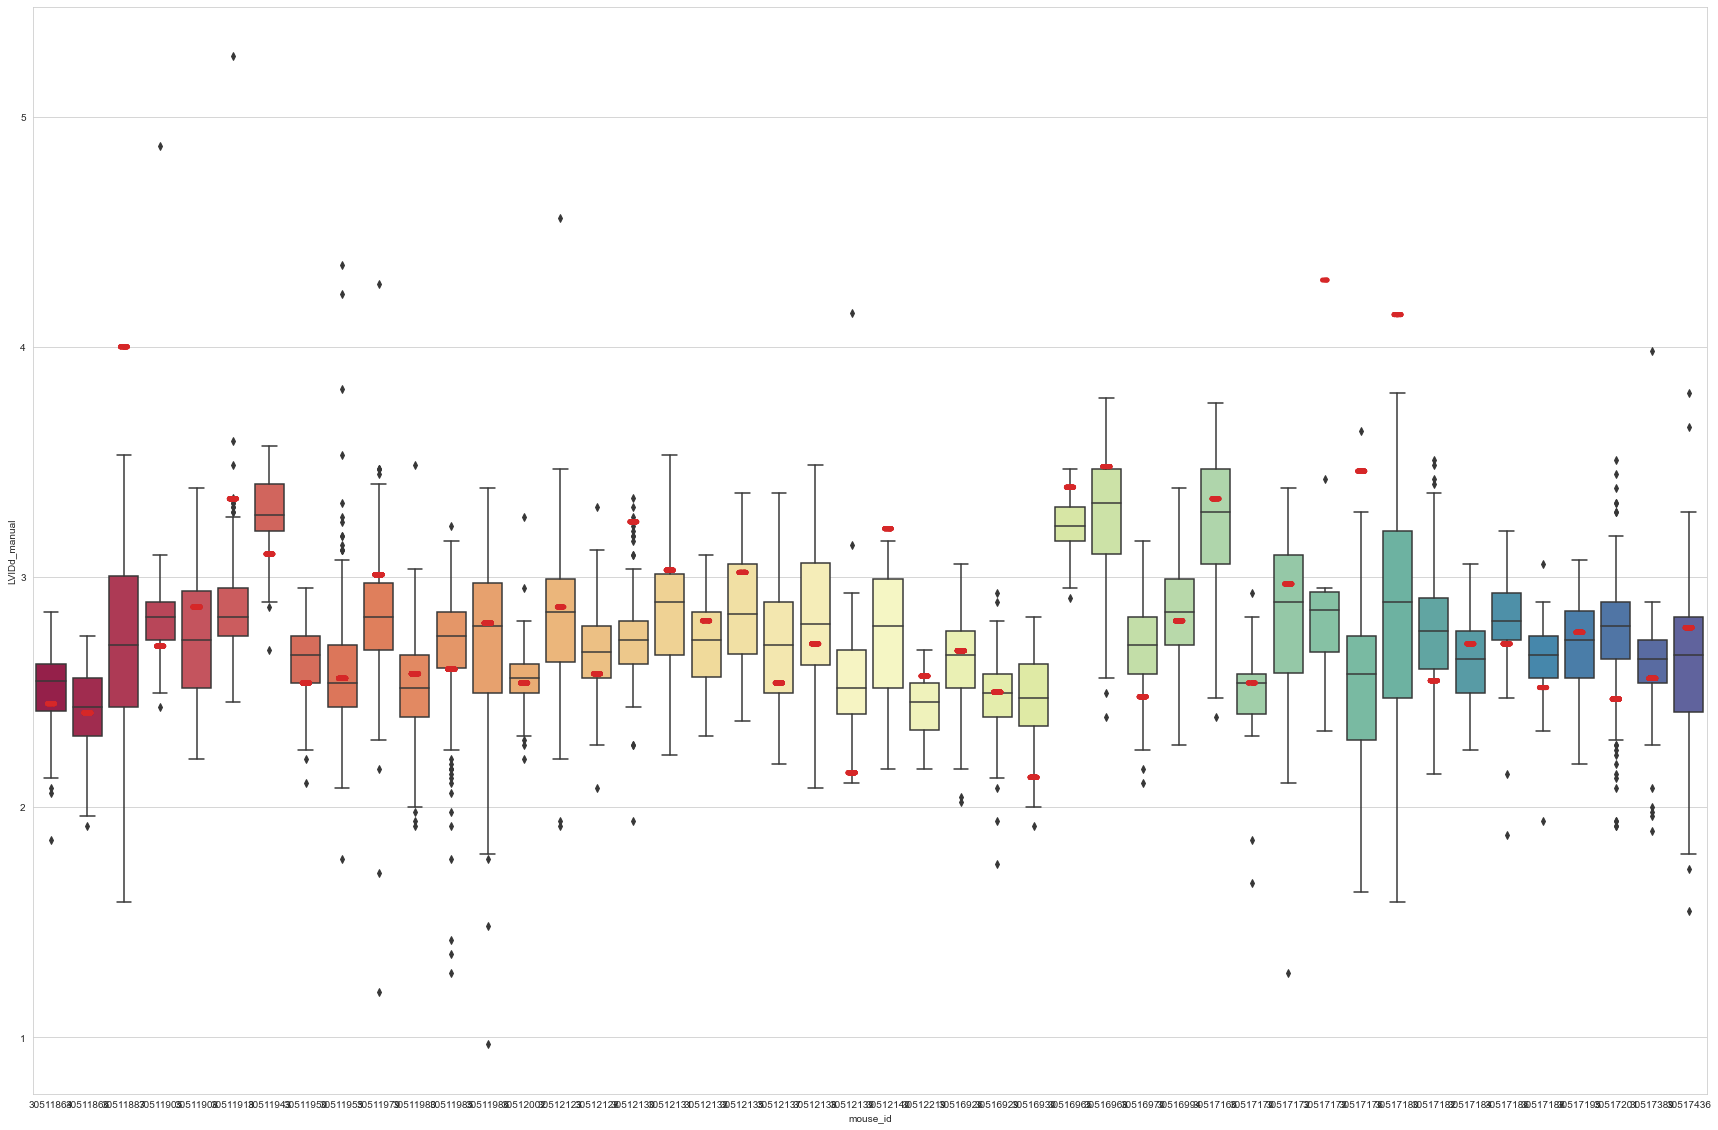

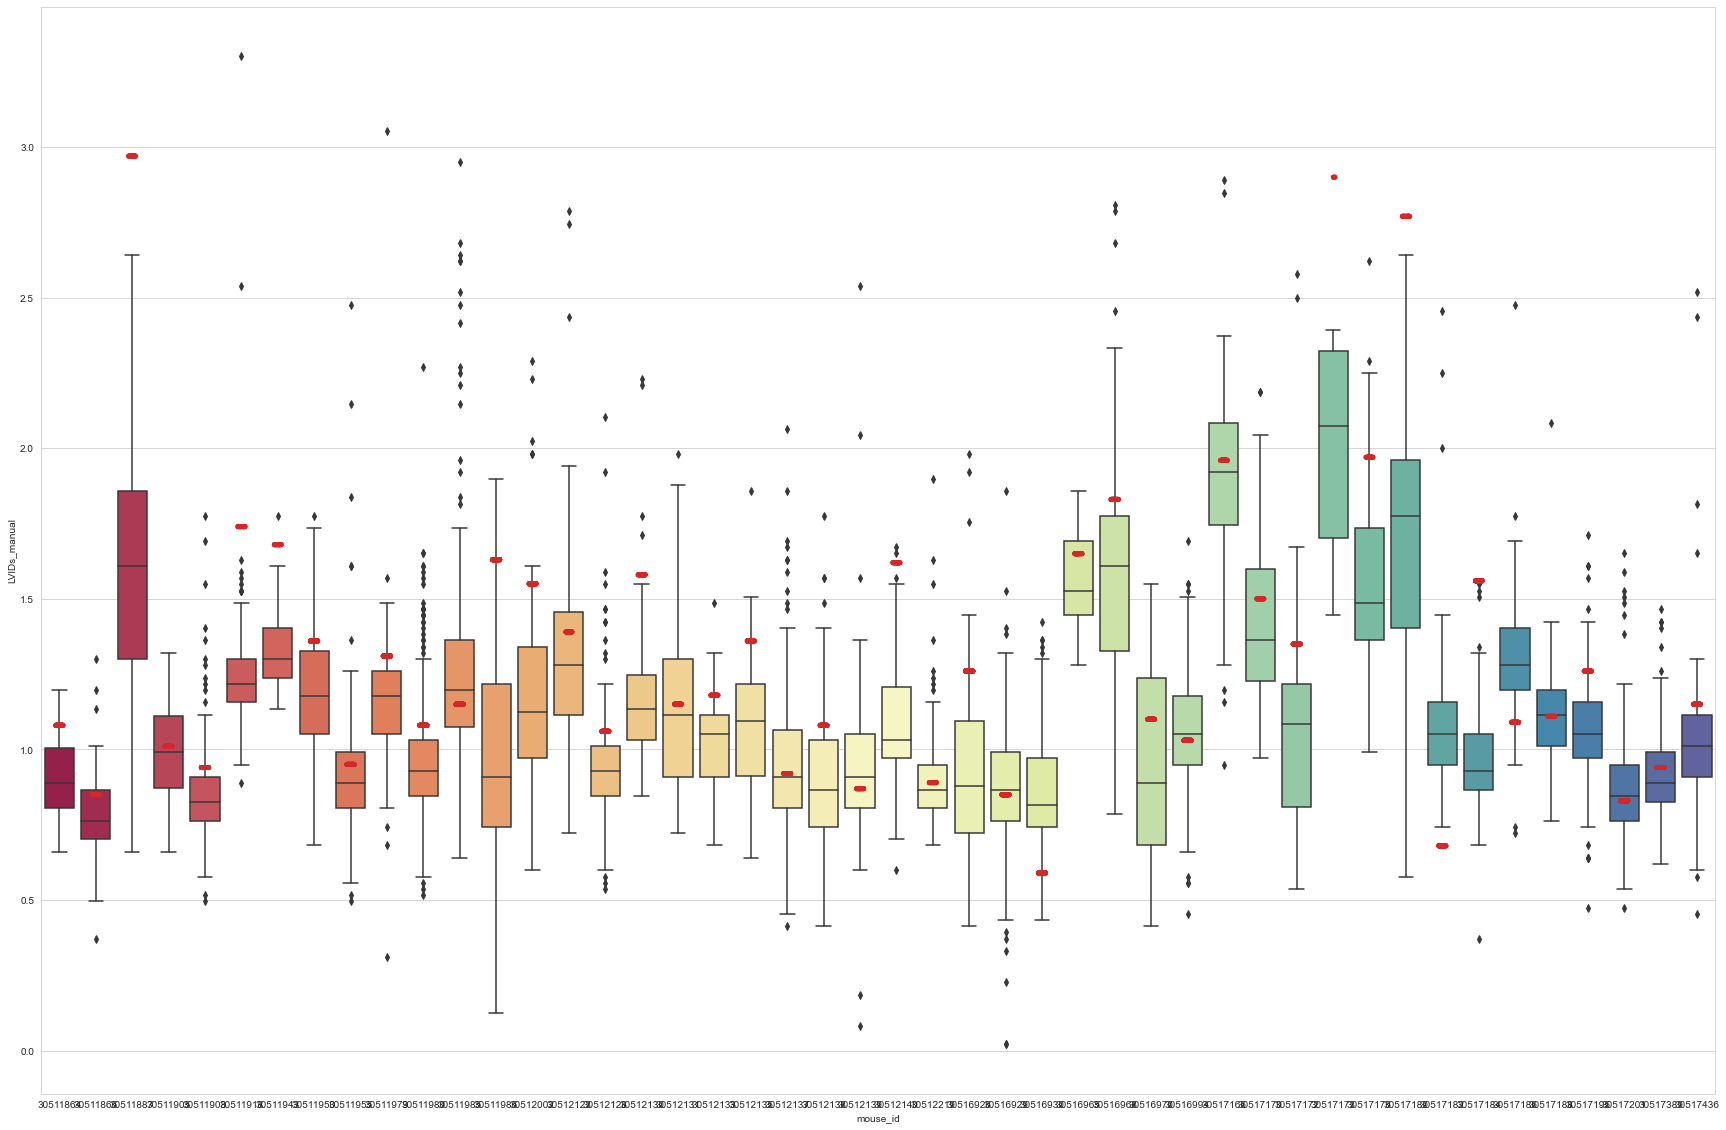

In [8]:
fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDd_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDd_manual", color=colors2)

fig = plt.subplots(figsize= (30,20))
sns.boxplot(data=filtered_data,  x="mouse_id", y="LVIDs_auto", palette=colors1)
sns.stripplot(data= filtered_data, x = "mouse_id", y = "LVIDs_manual", color=colors2)

### Overview per mouse per parameter

/var/folders/n_/jbljd4tj5n597j4x17mmm_240000gp/T/ipykernel_79861/1900006949.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.subplots(figsize= (10,10))


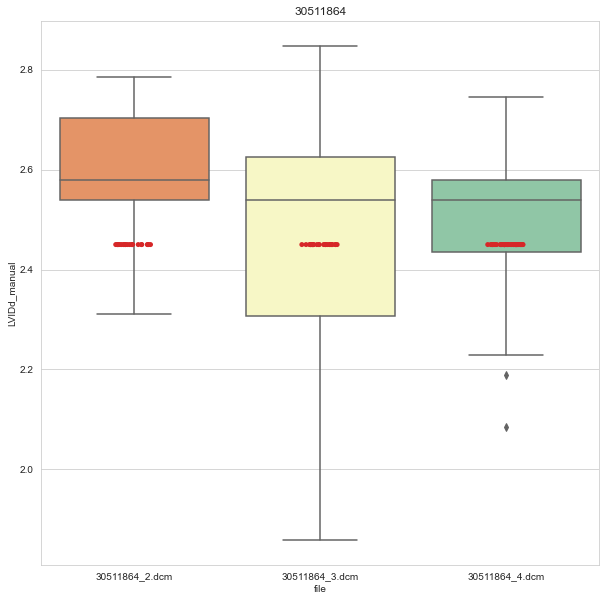

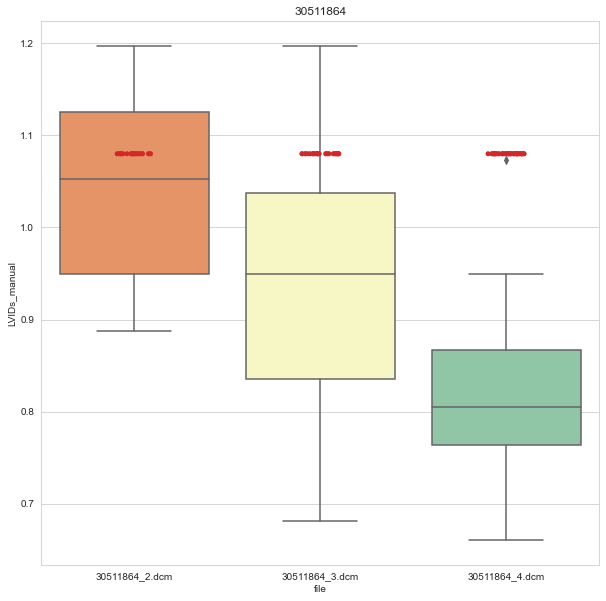

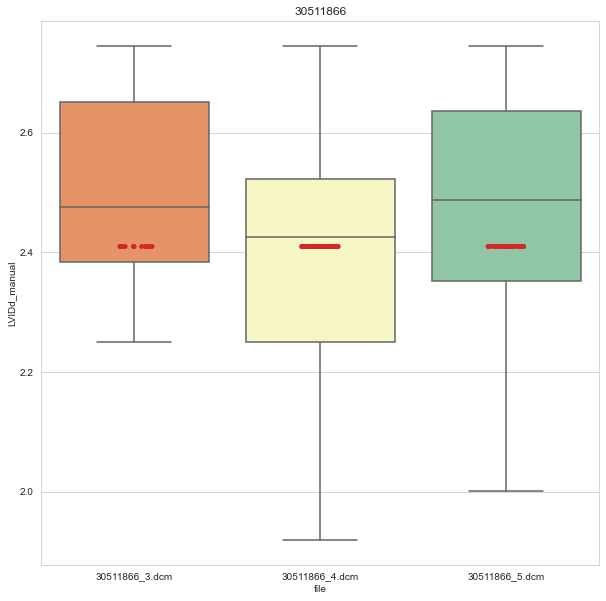

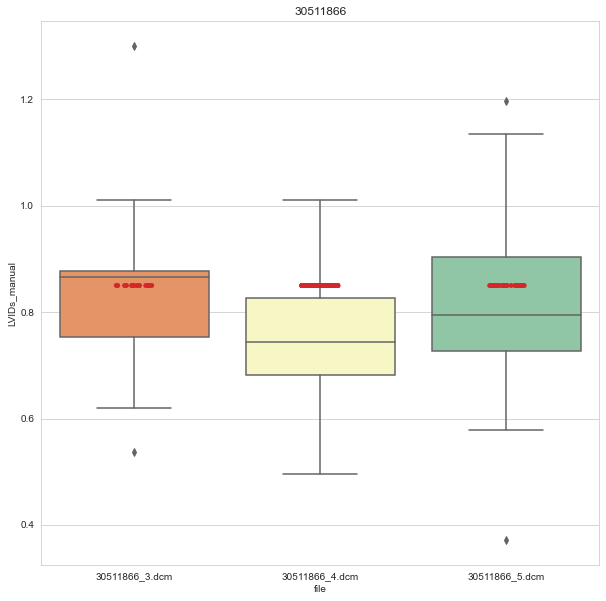

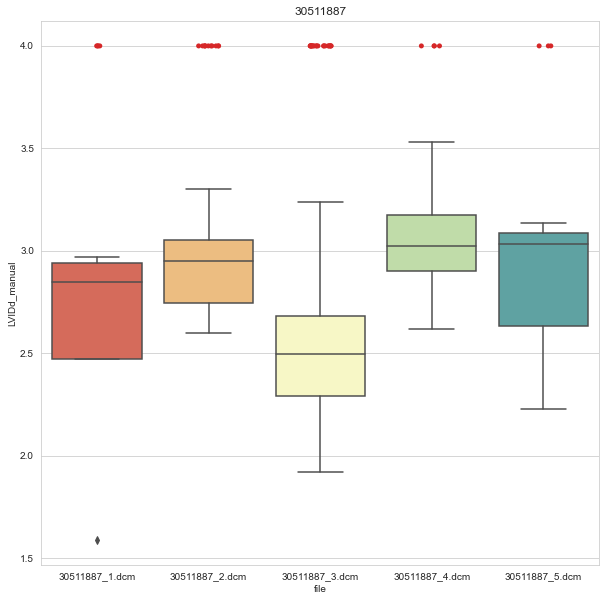

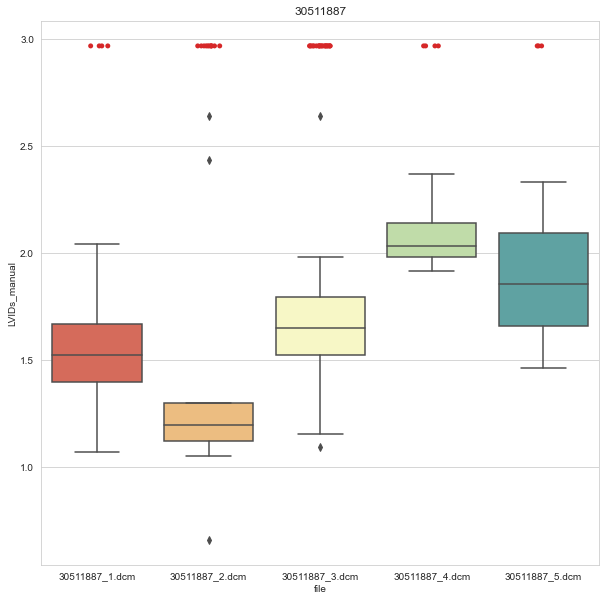

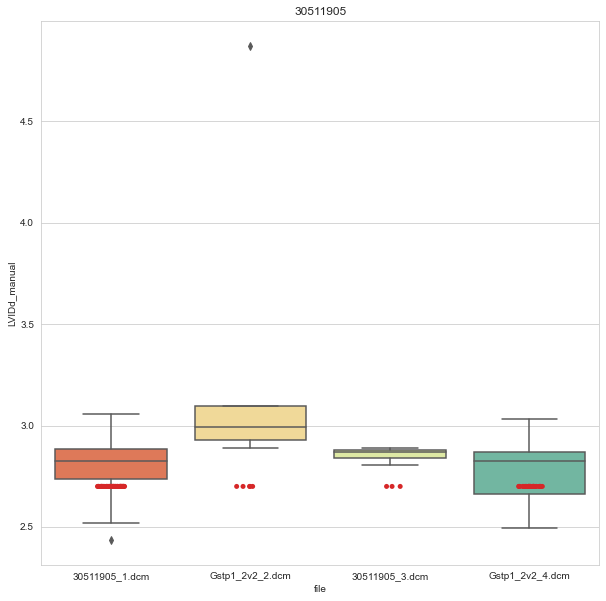

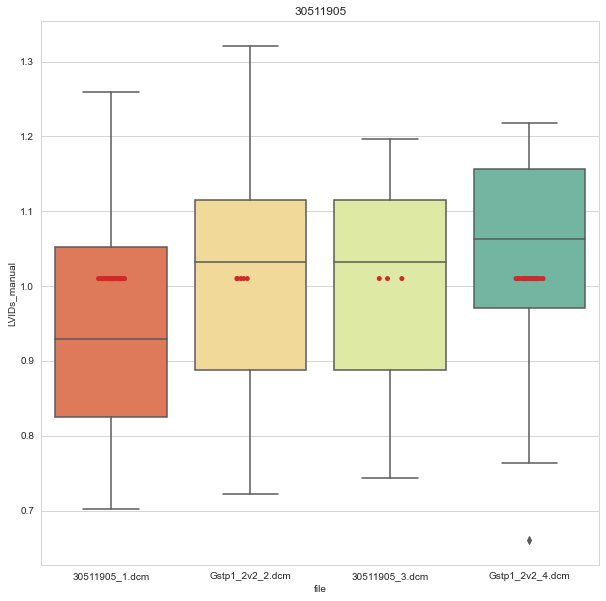

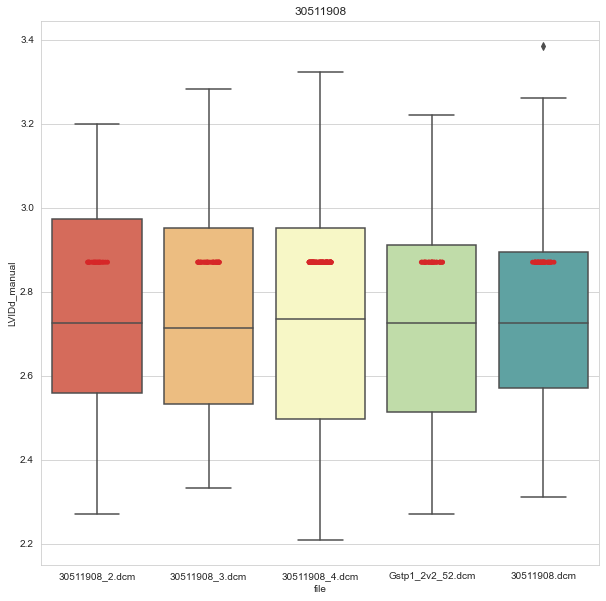

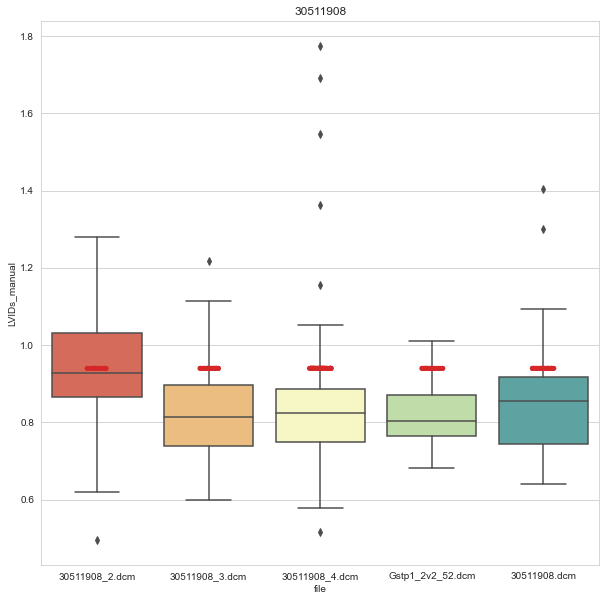

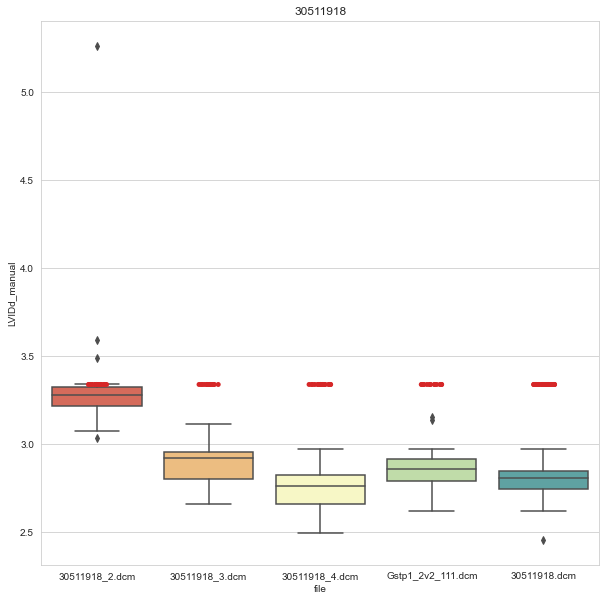

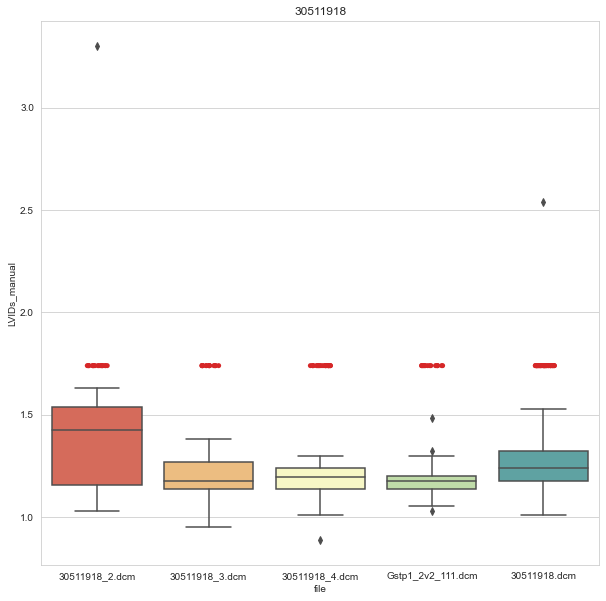

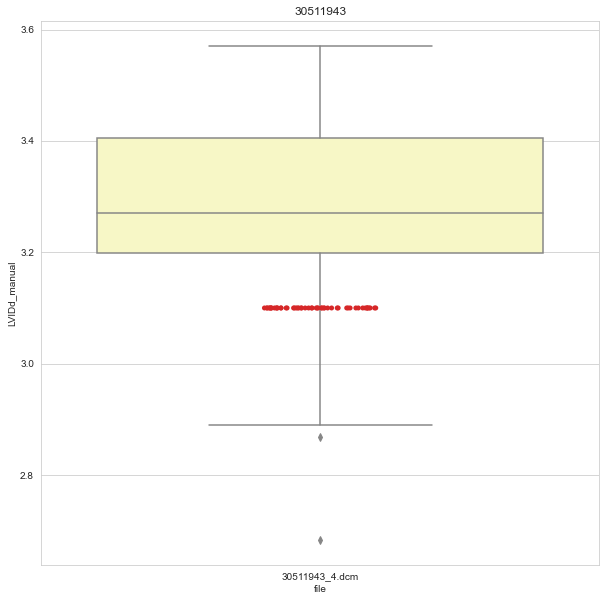

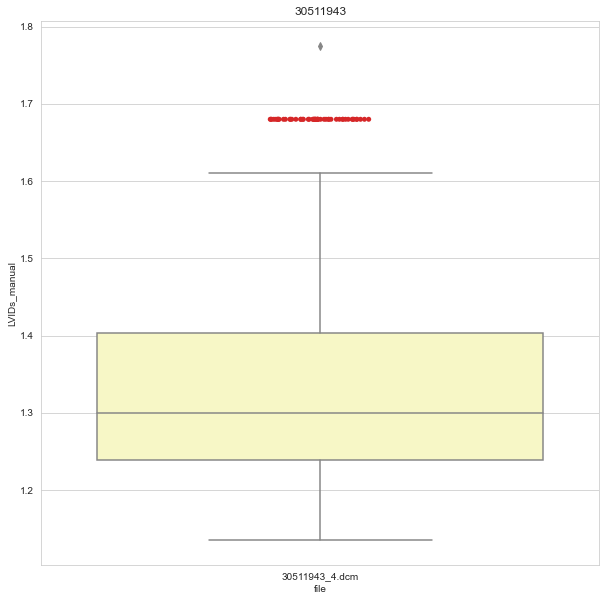

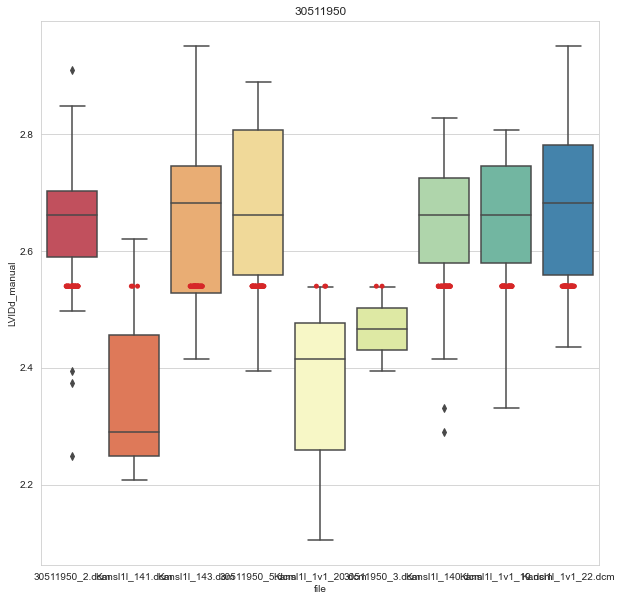

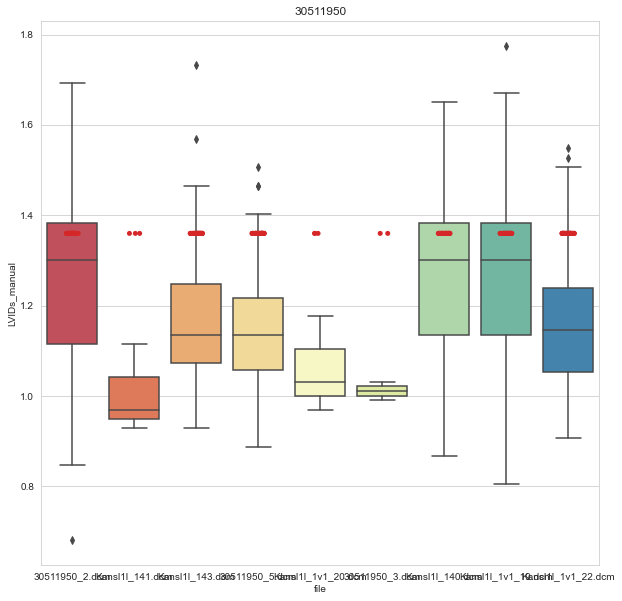

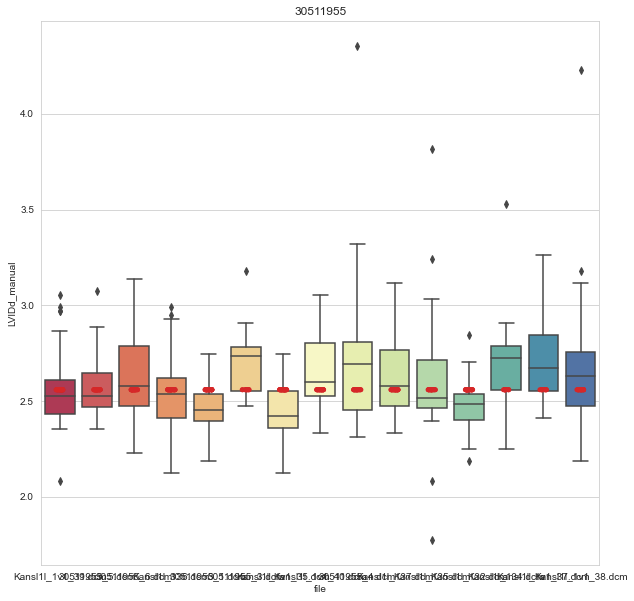

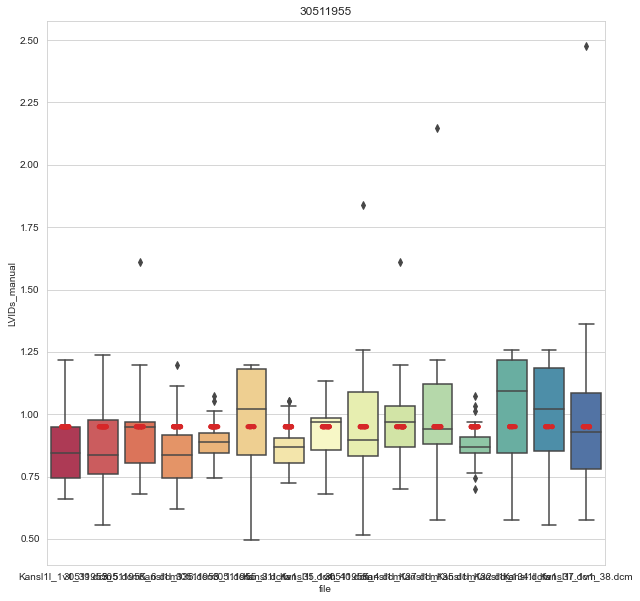

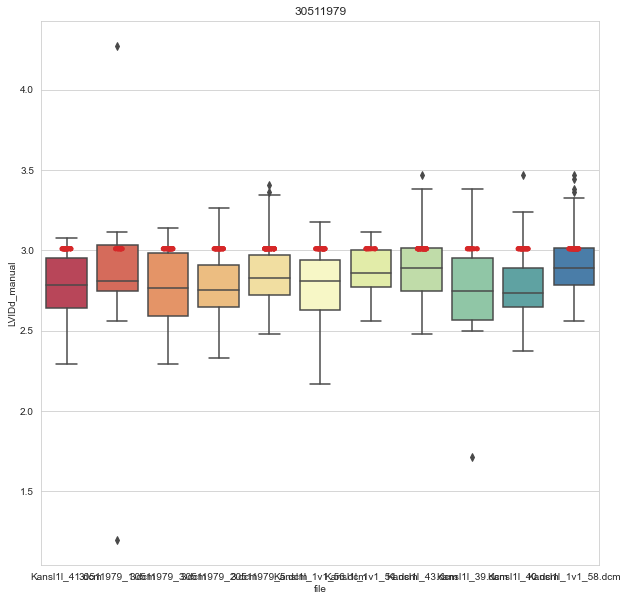

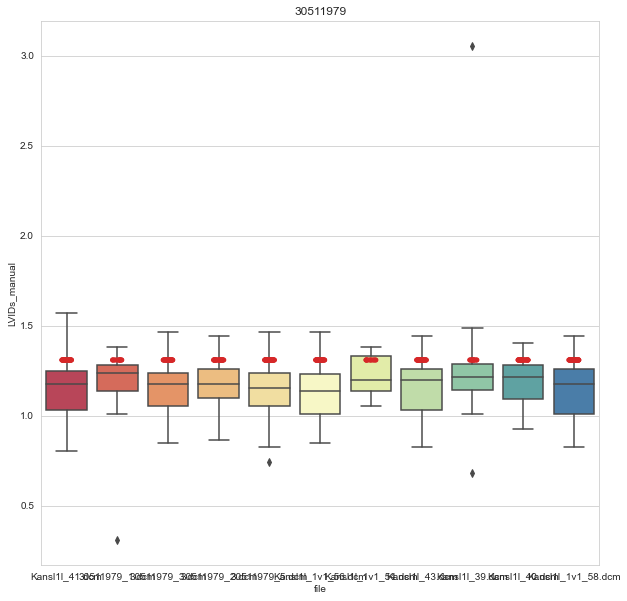

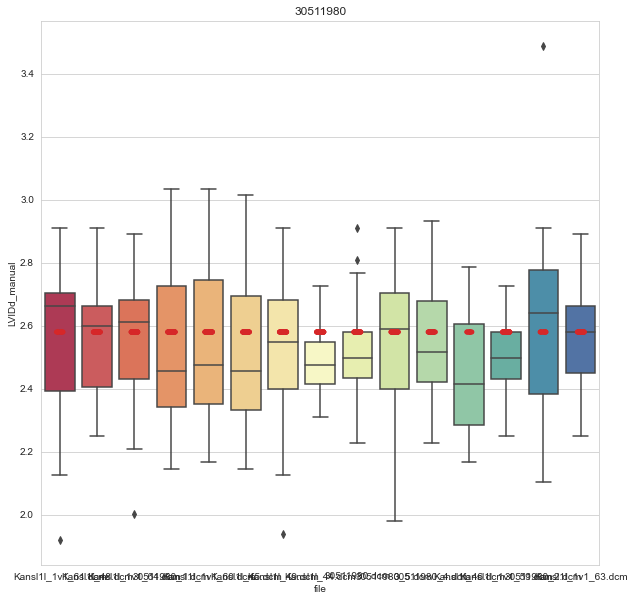

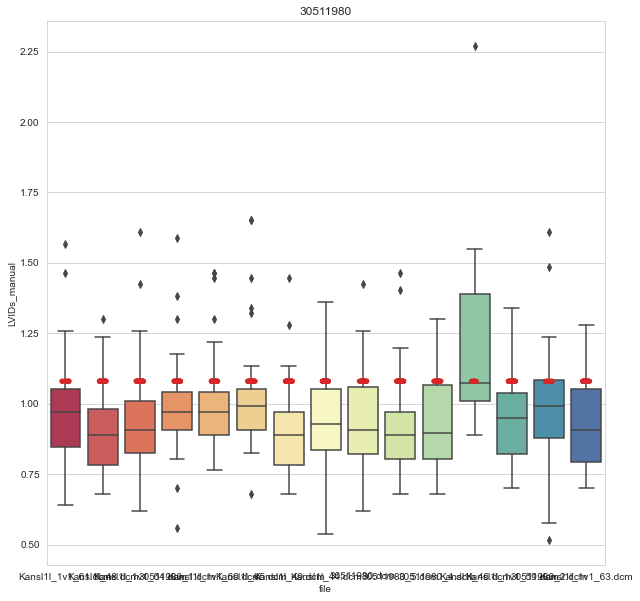

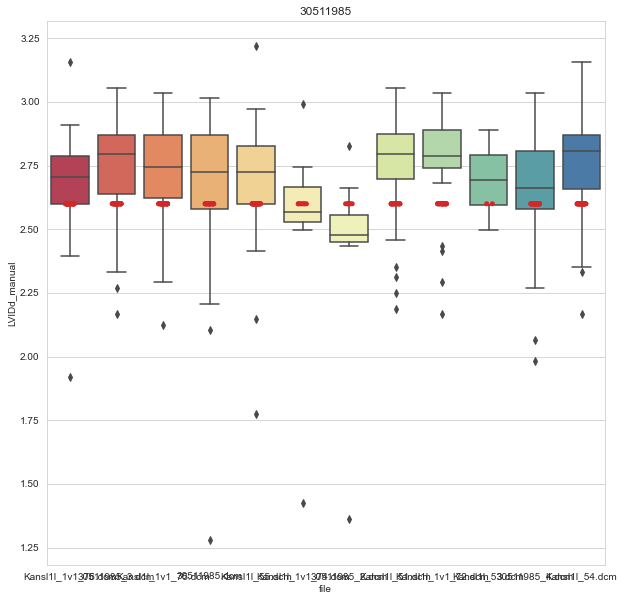

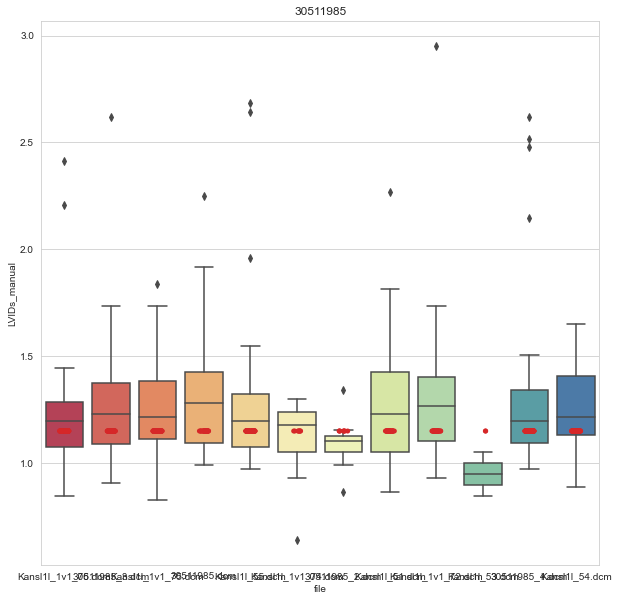

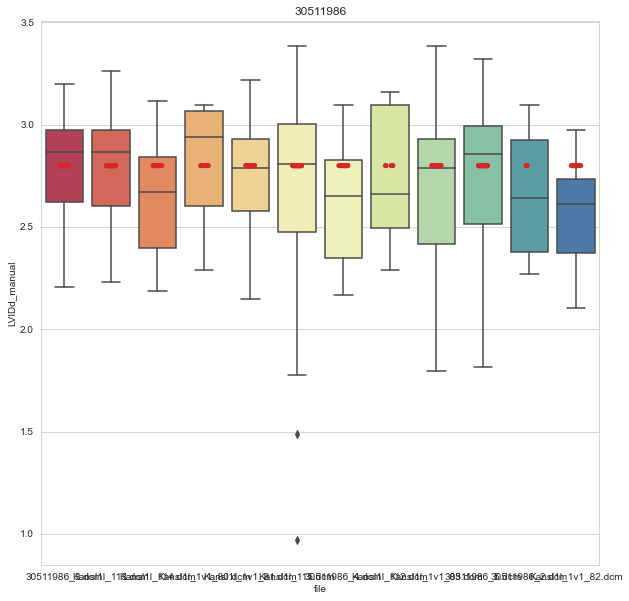

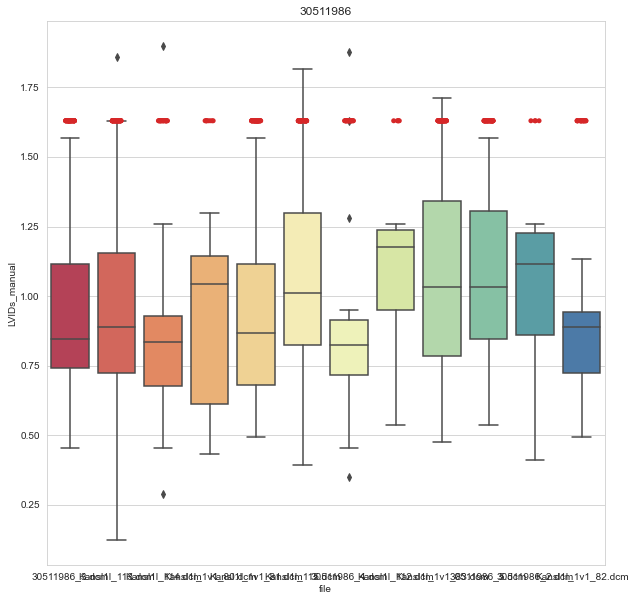

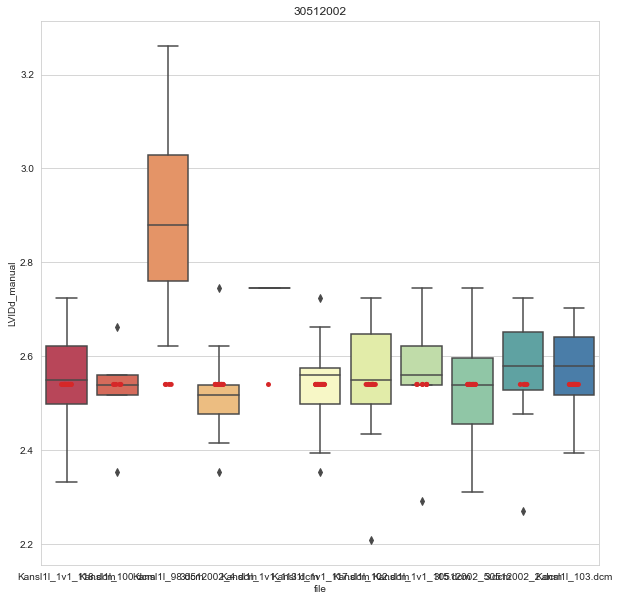

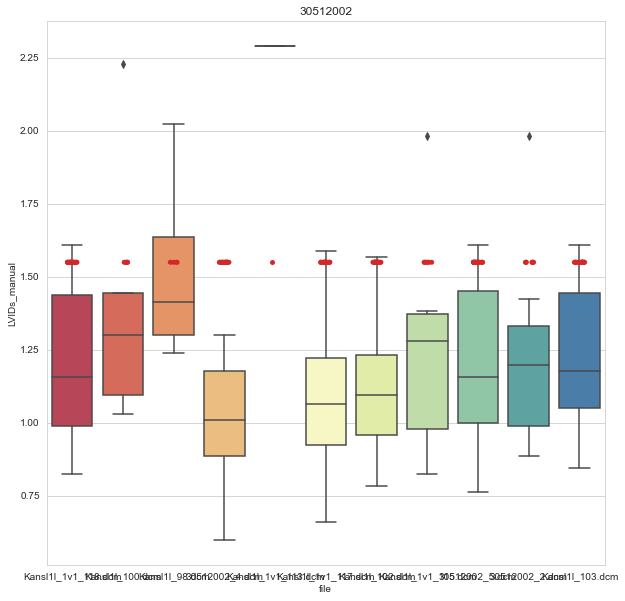

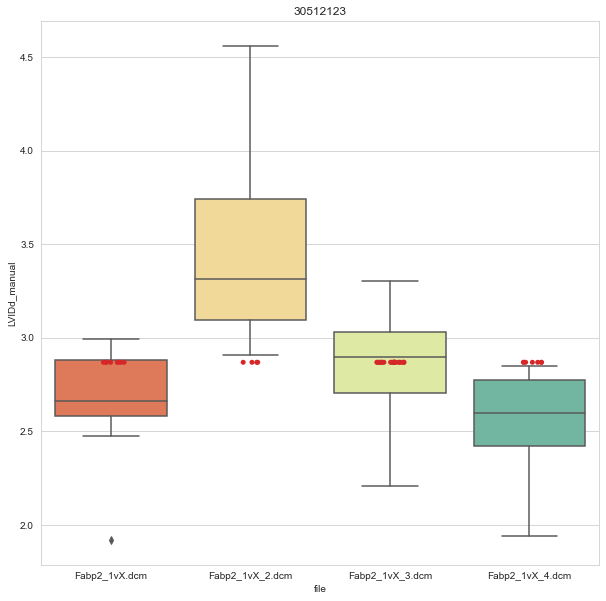

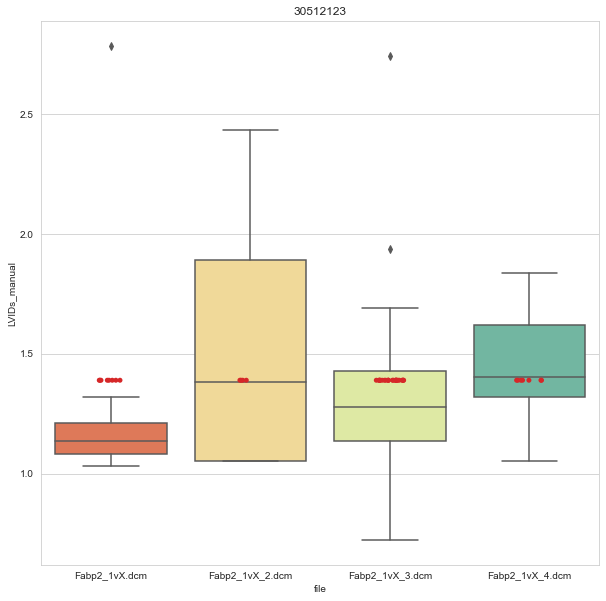

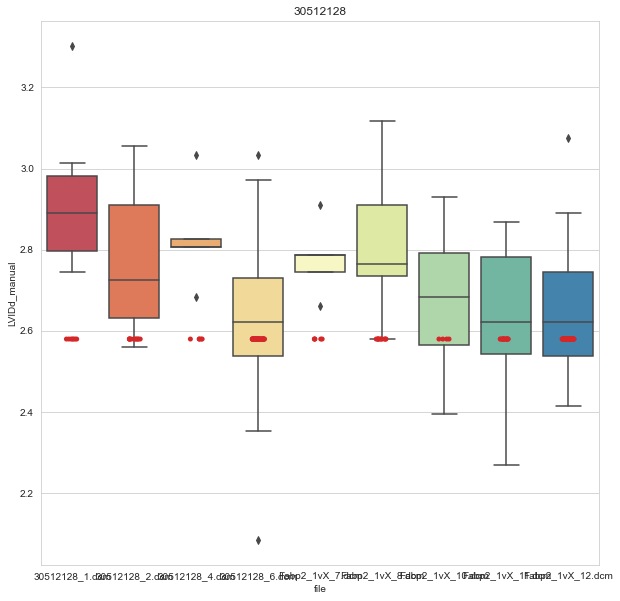

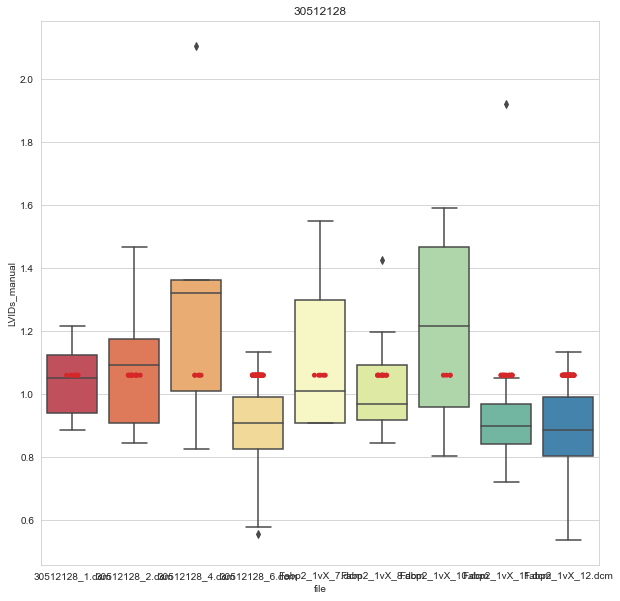

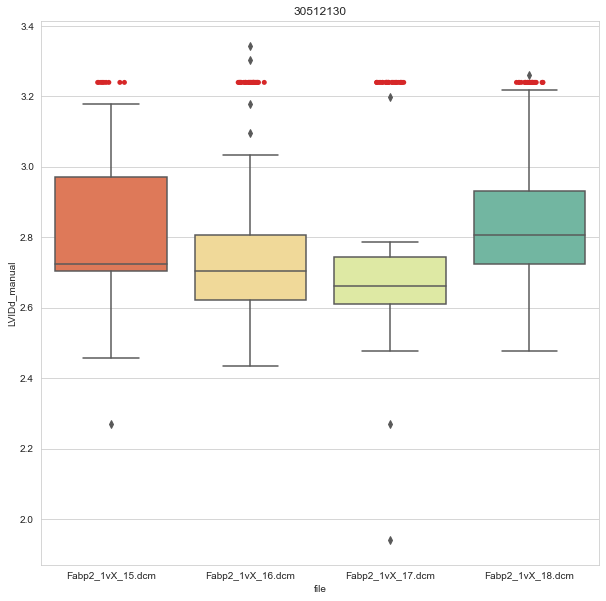

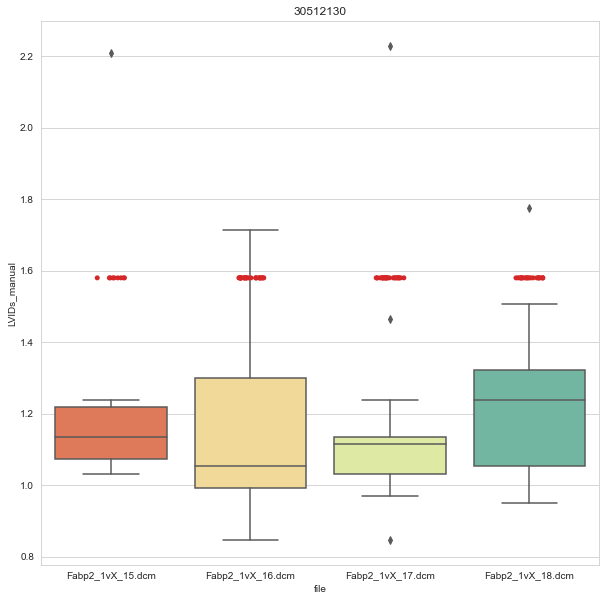

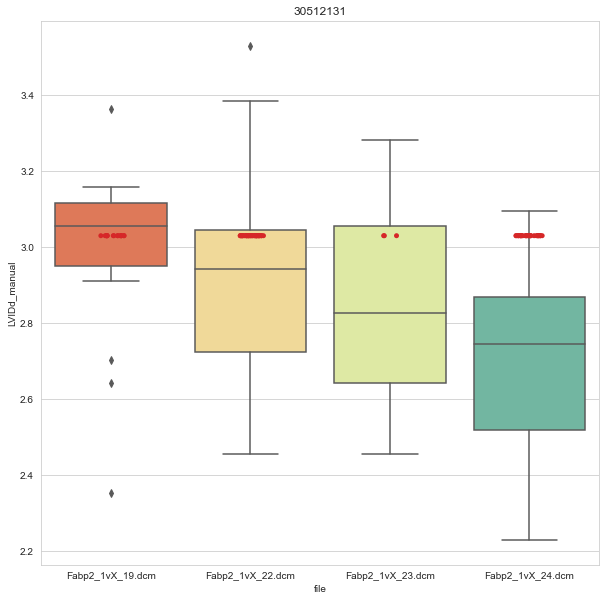

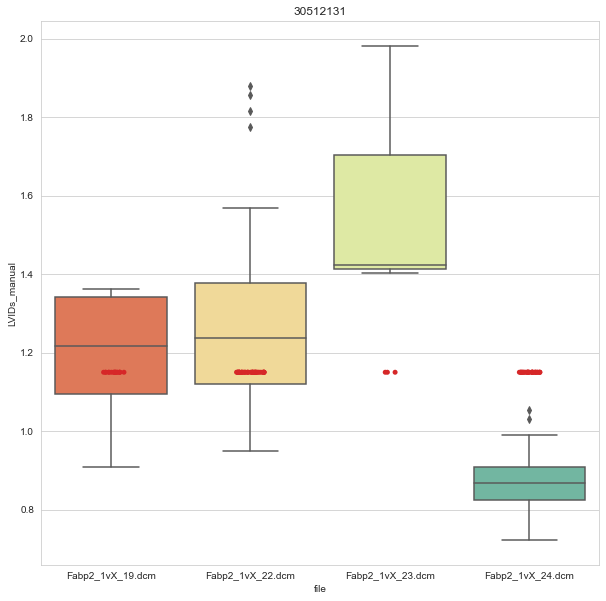

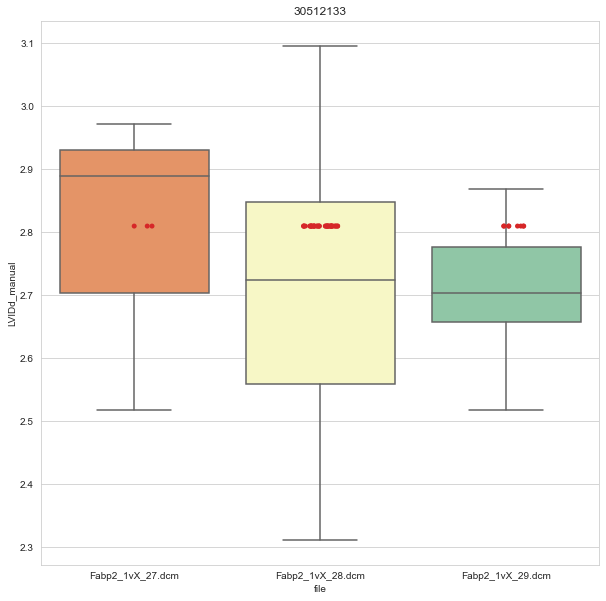

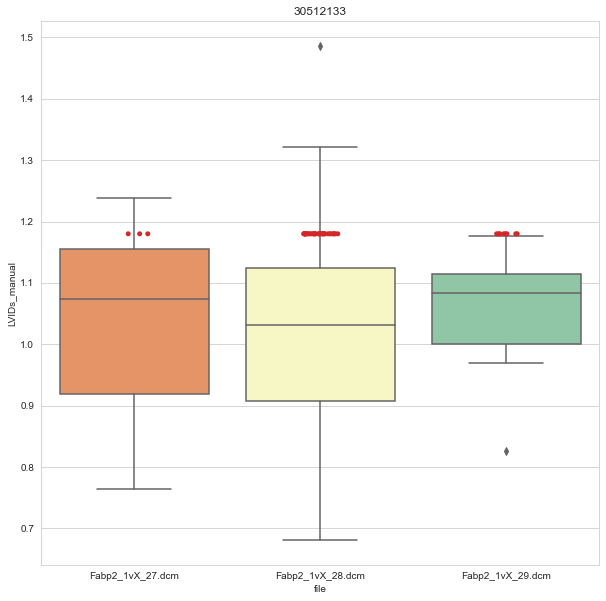

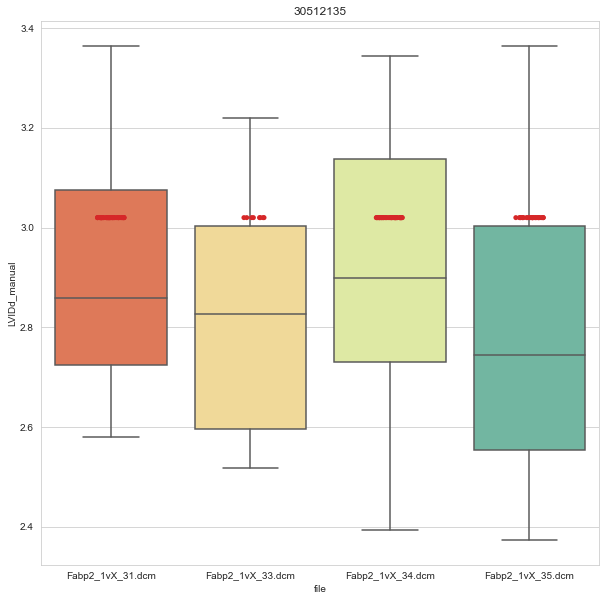

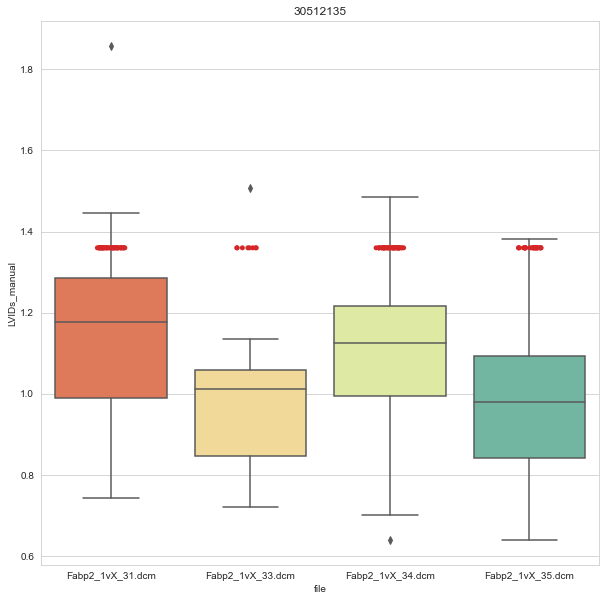

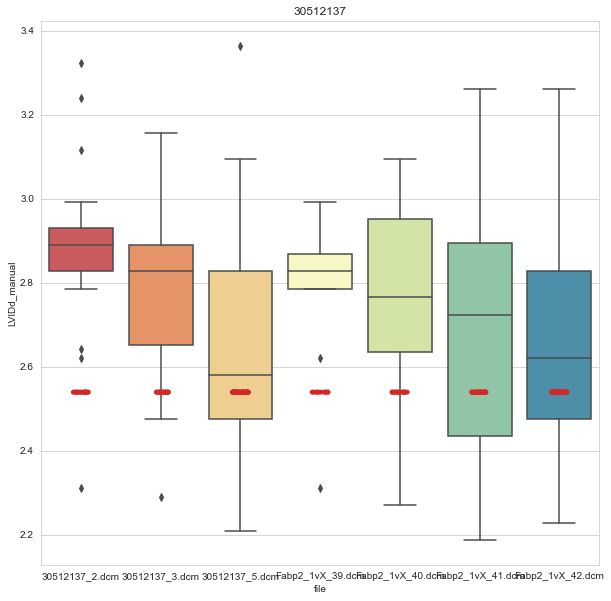

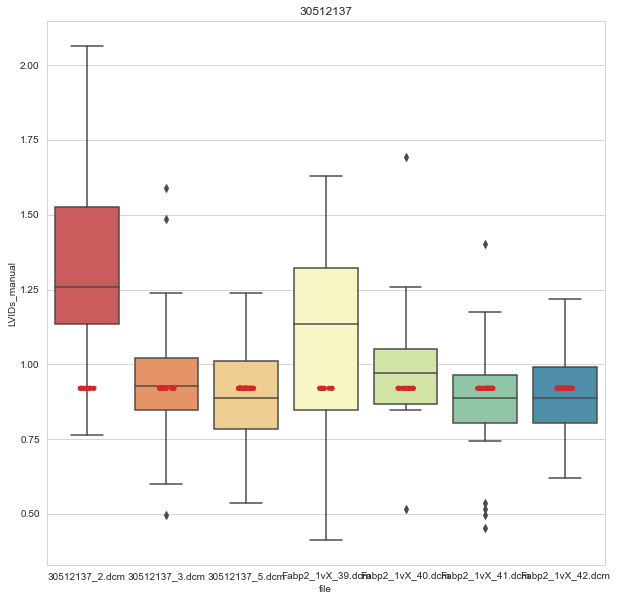

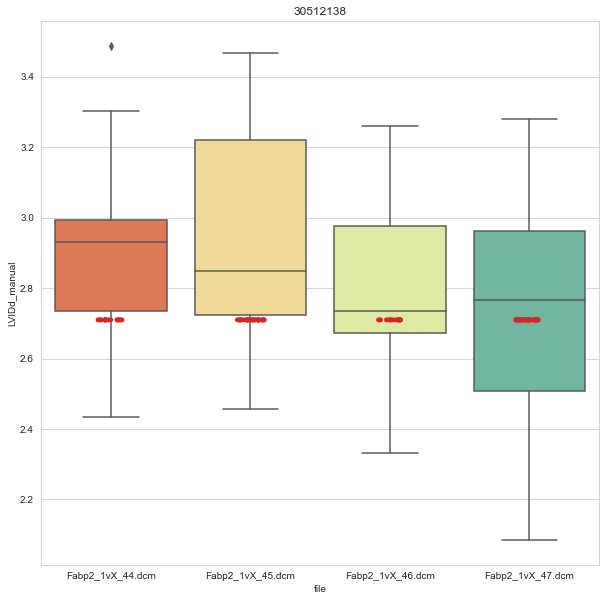

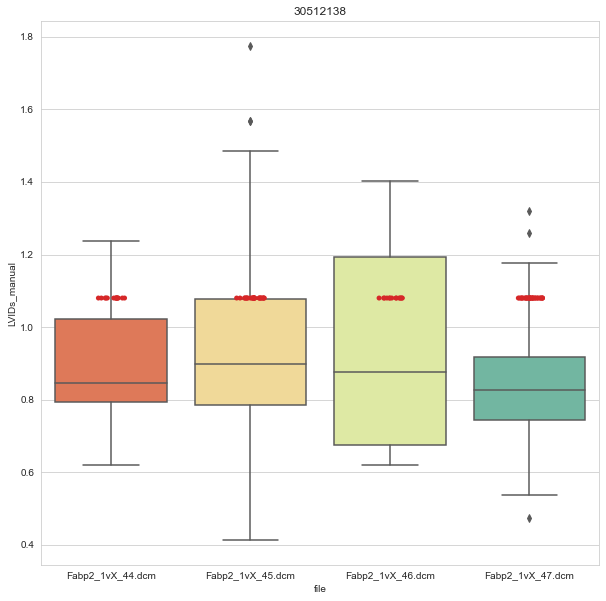

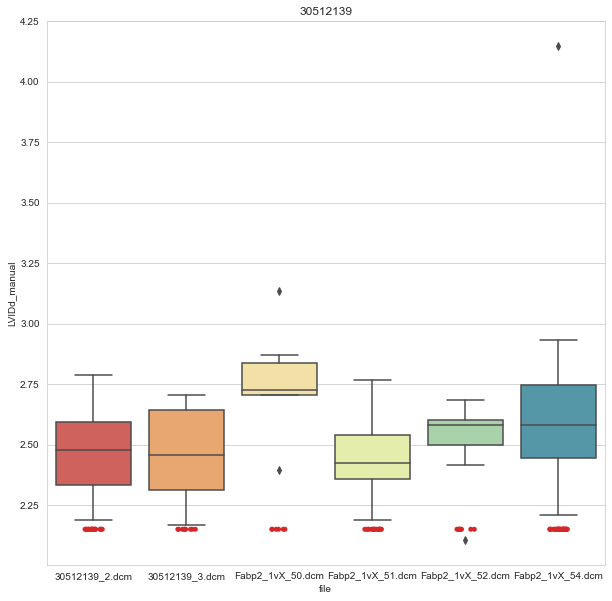

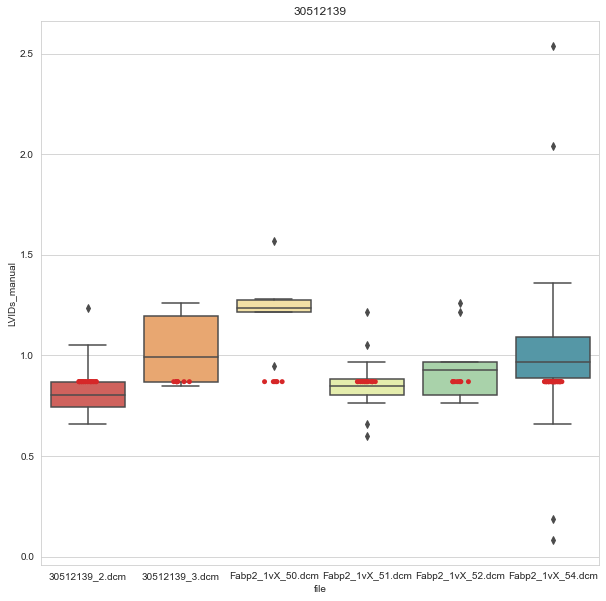

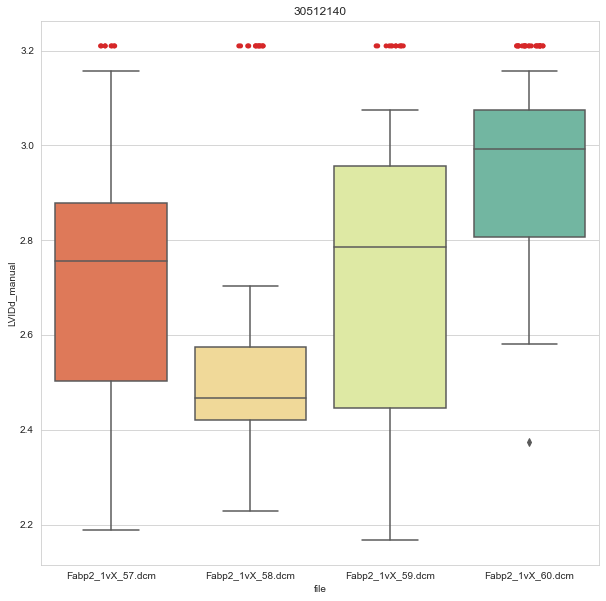

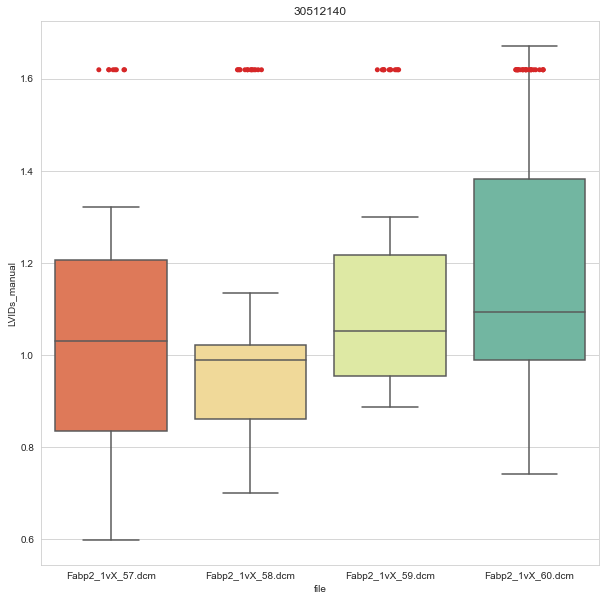

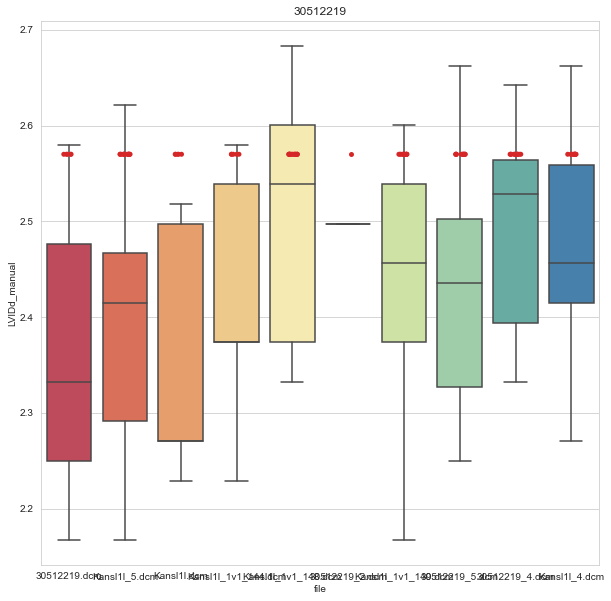

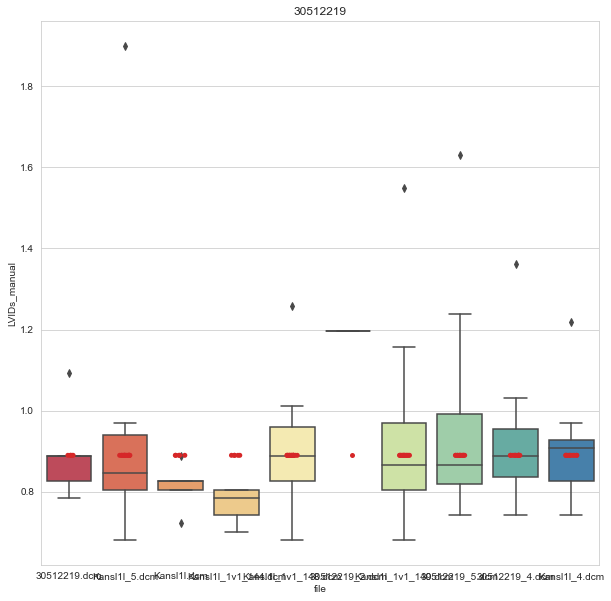

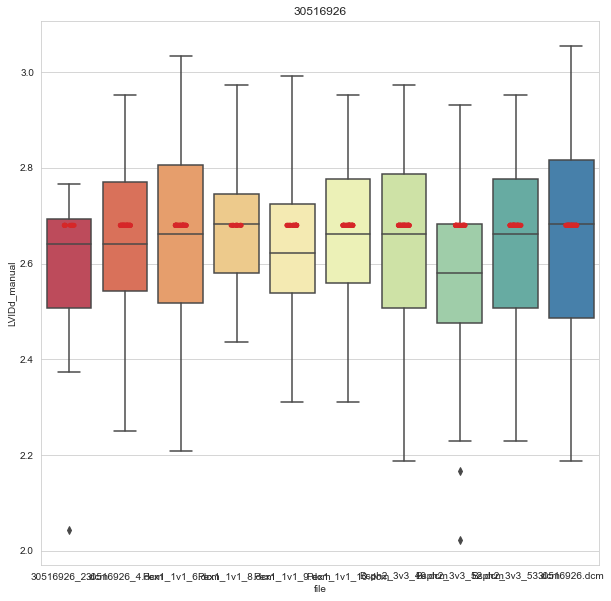

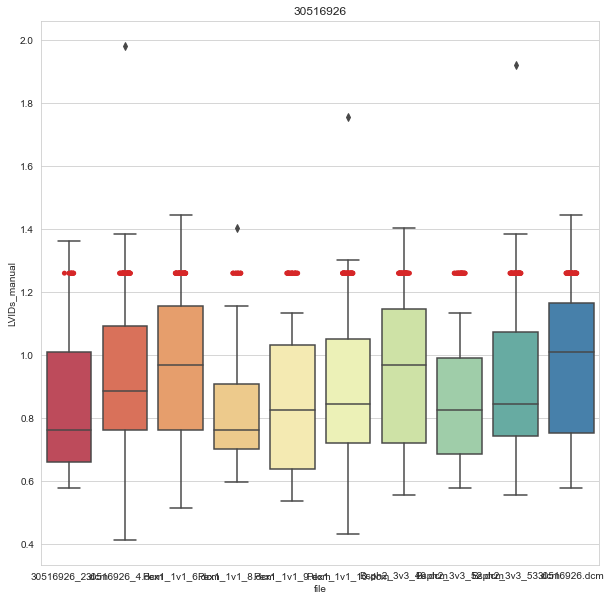

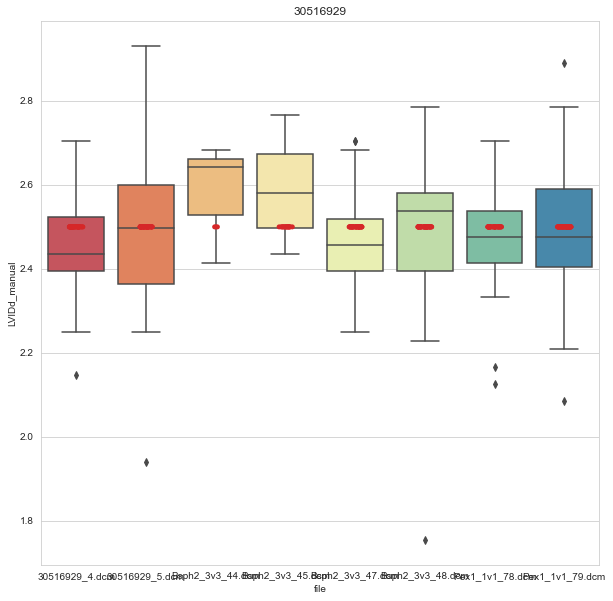

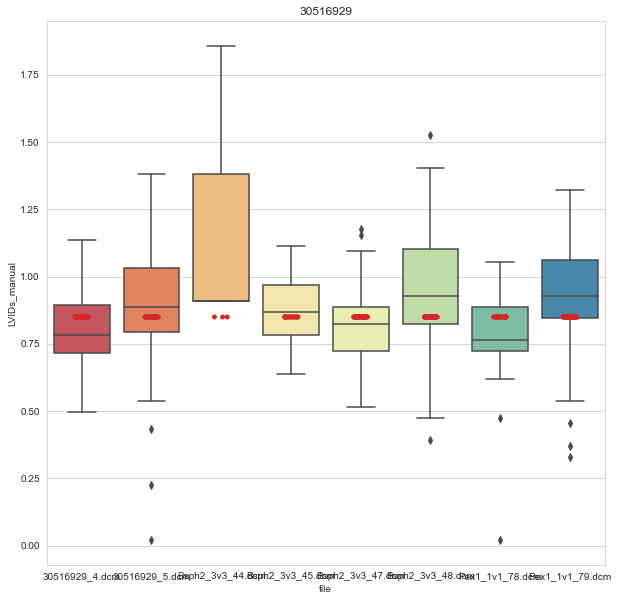

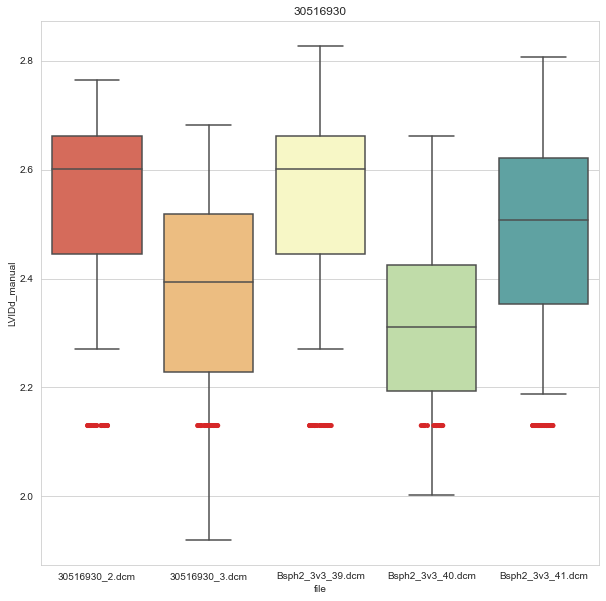

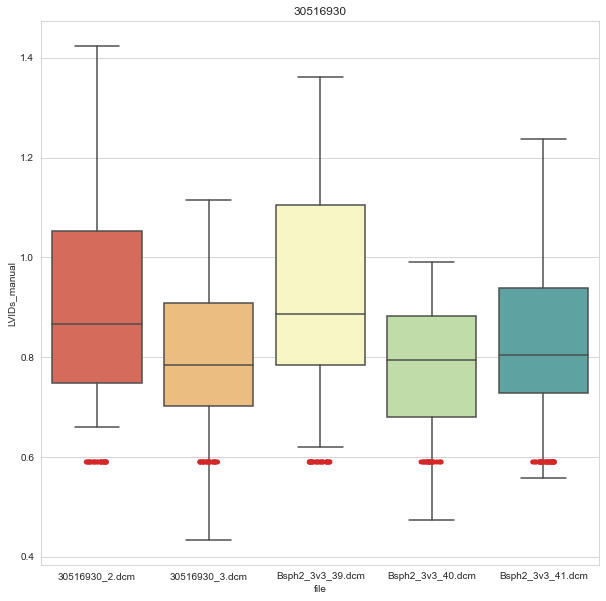

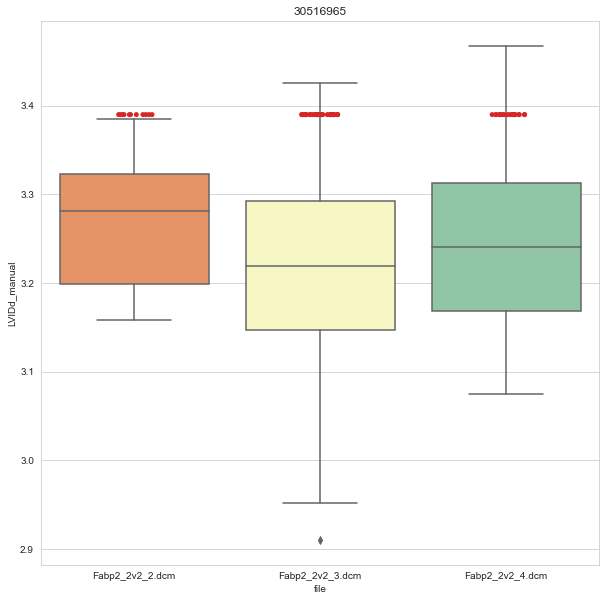

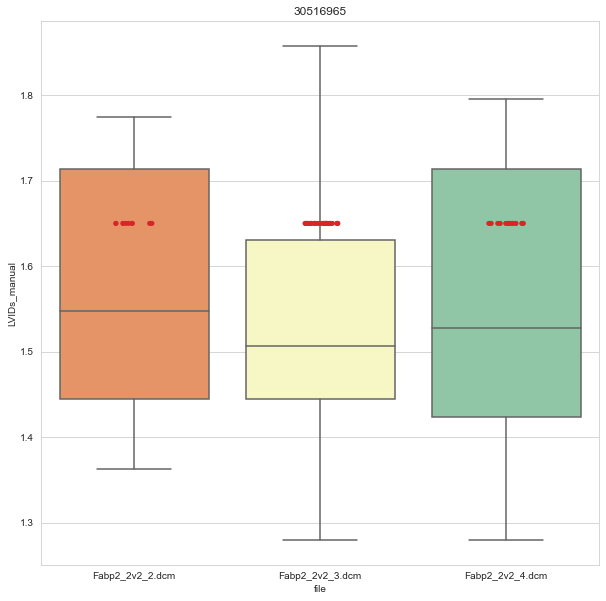

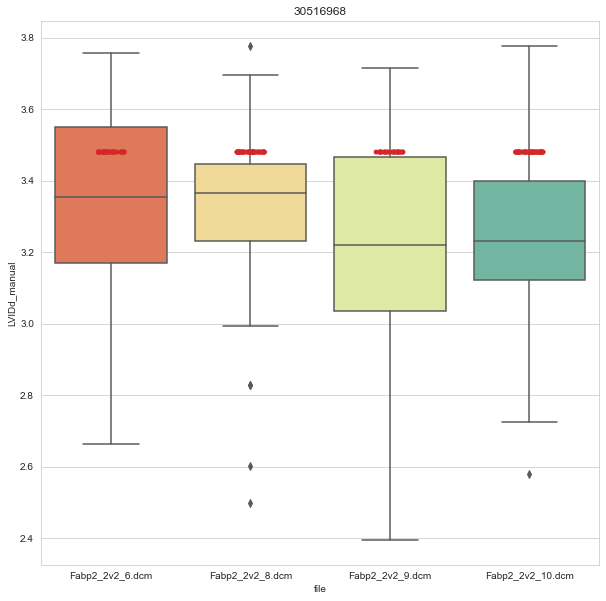

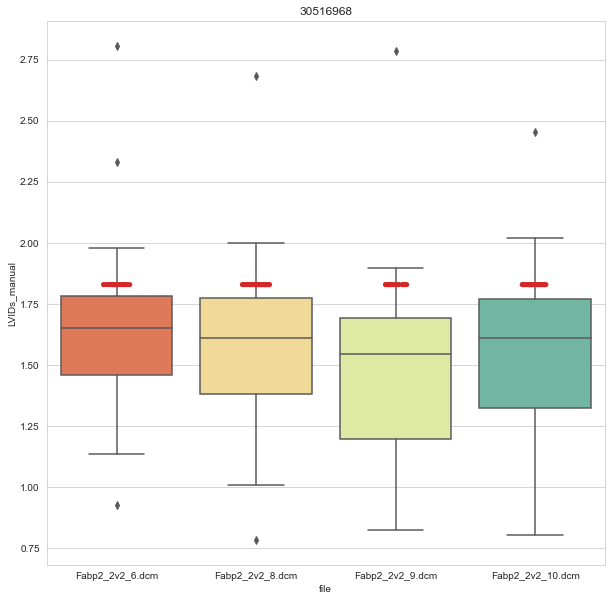

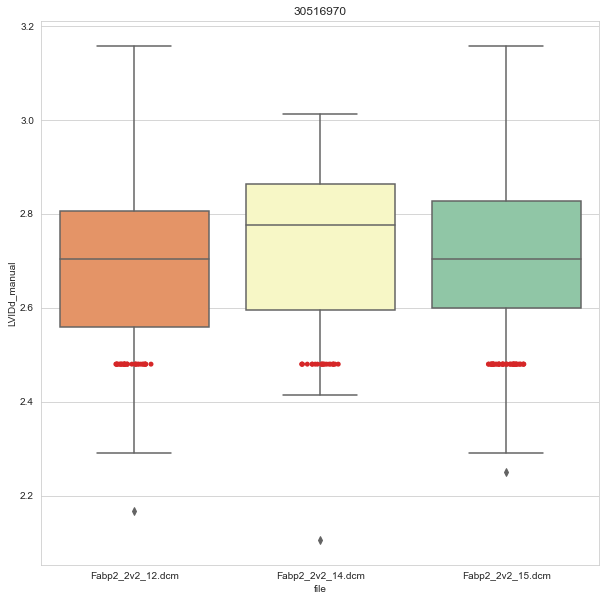

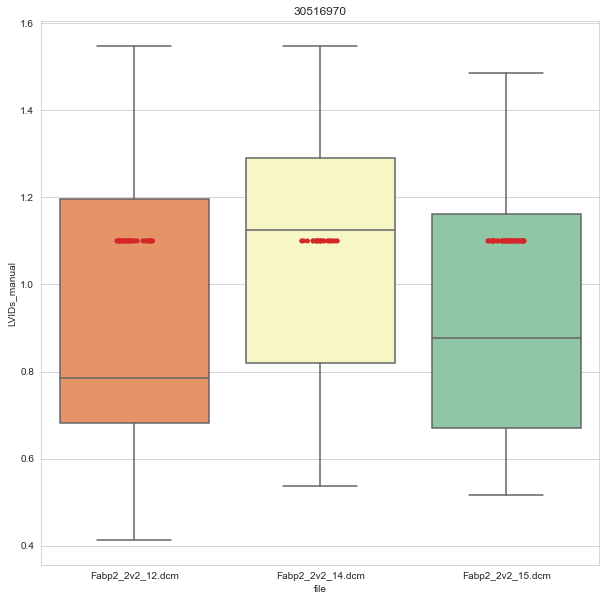

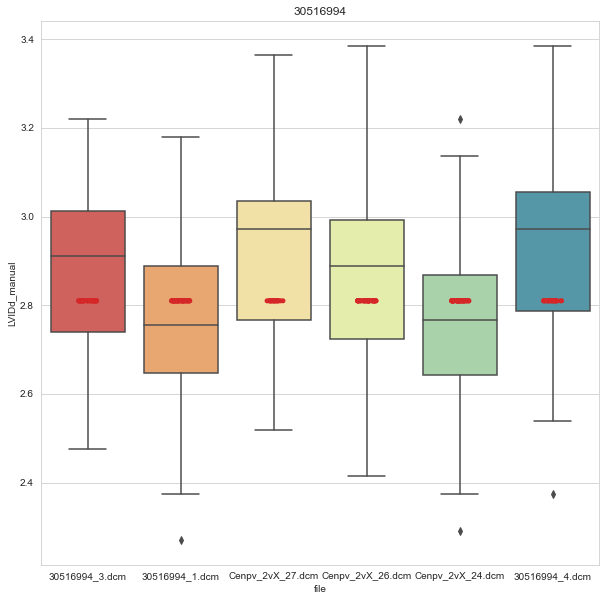

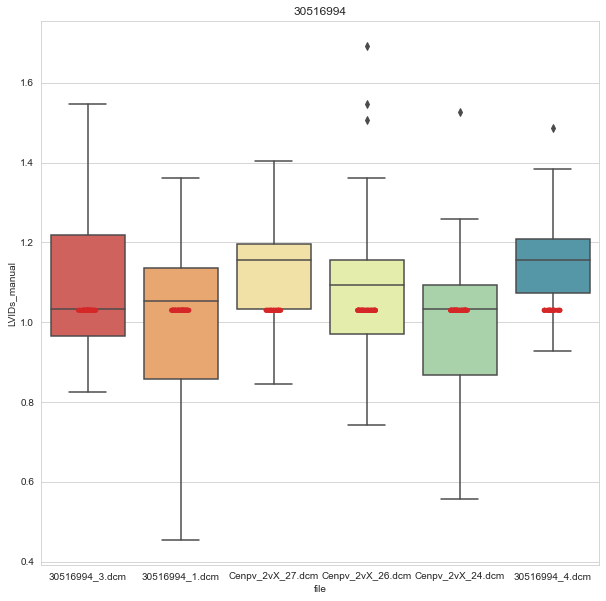

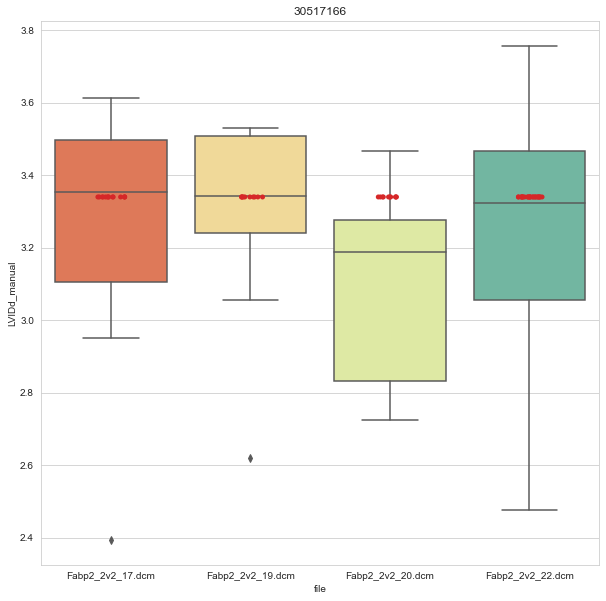

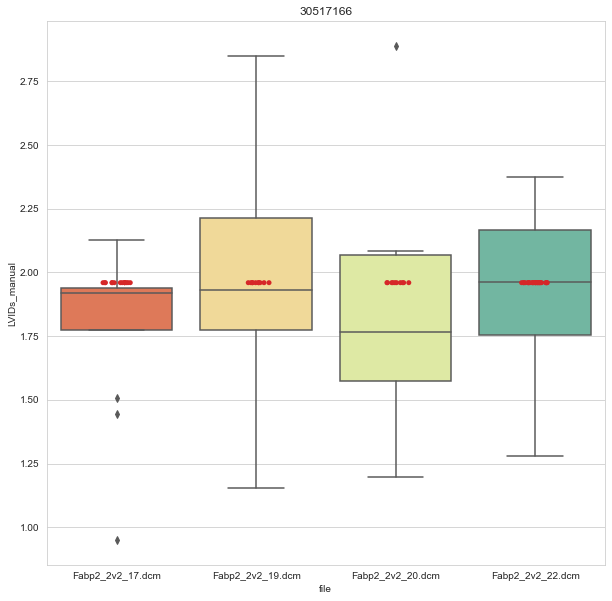

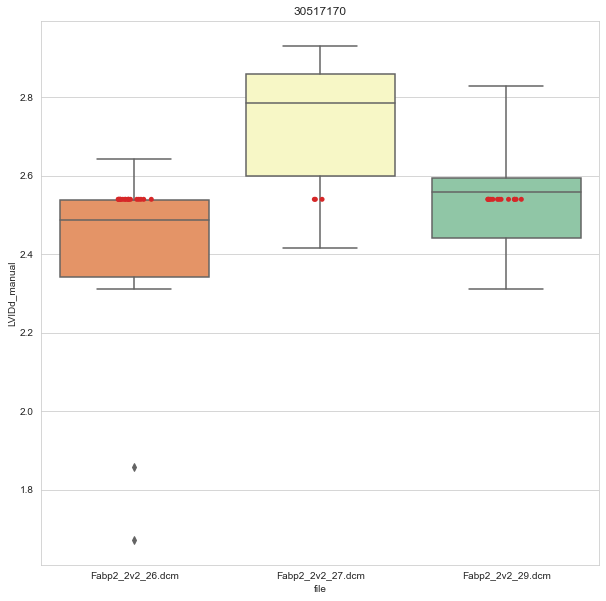

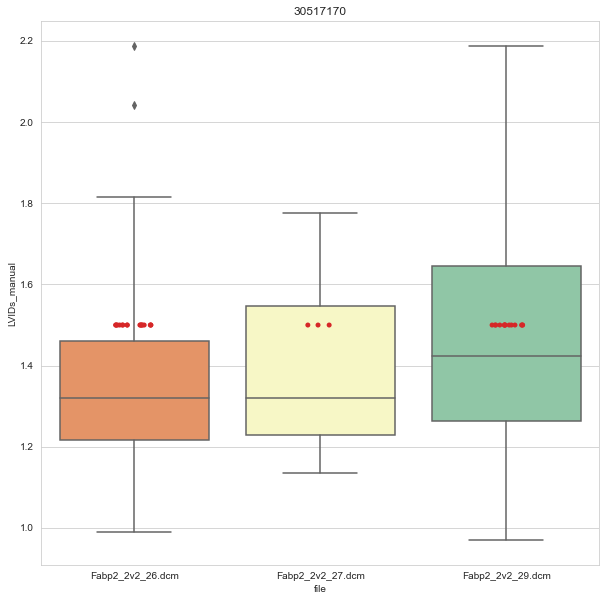

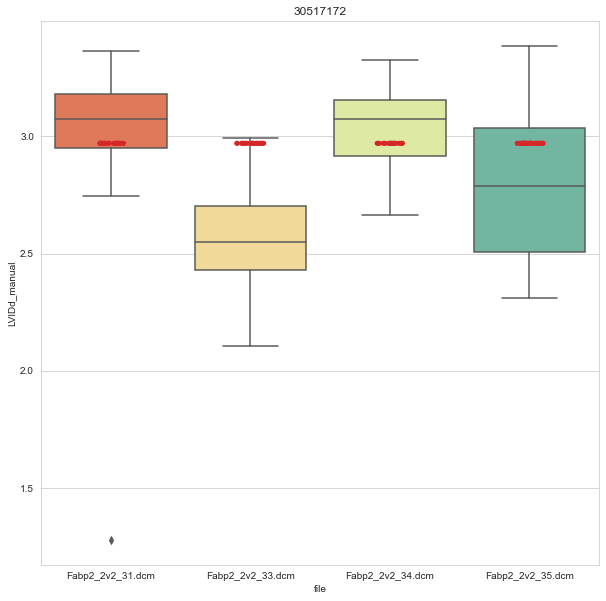

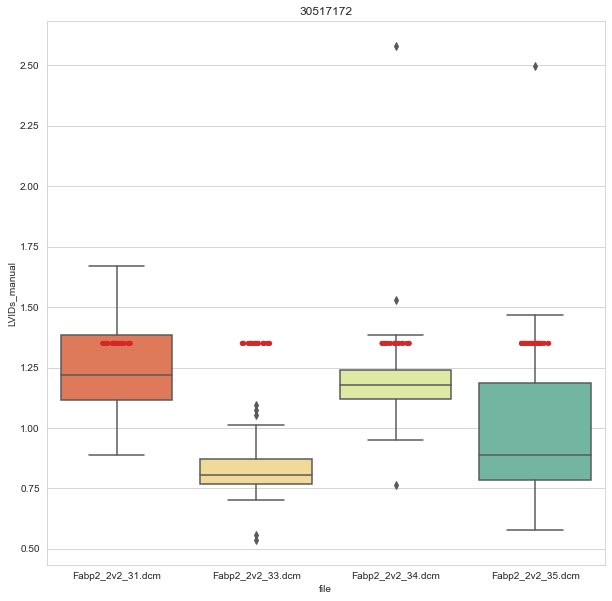

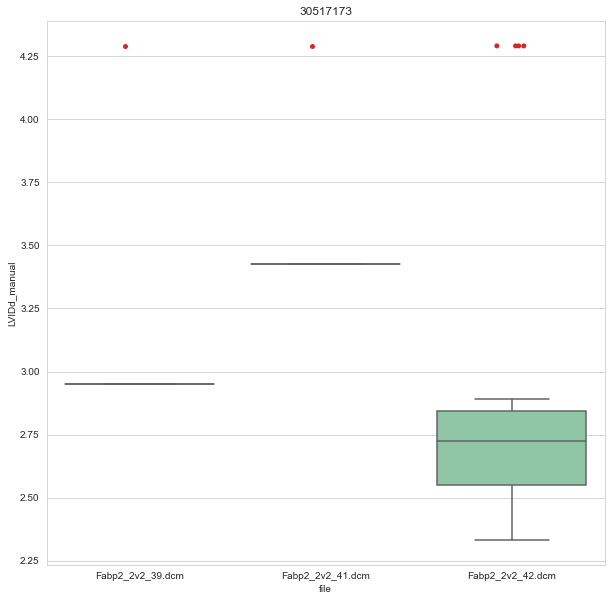

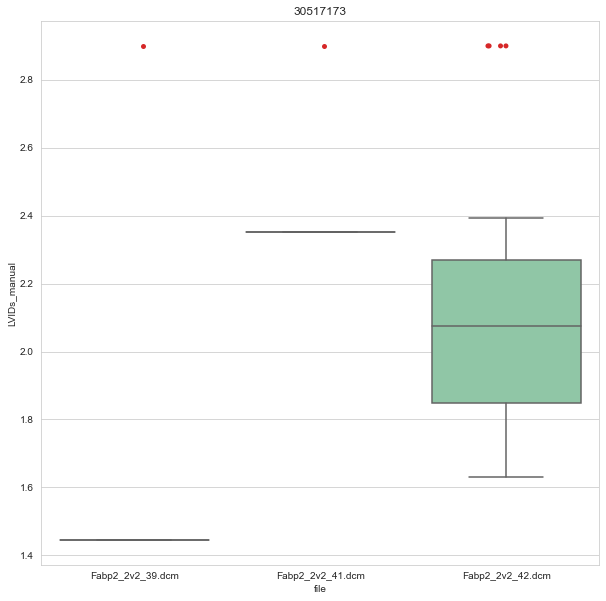

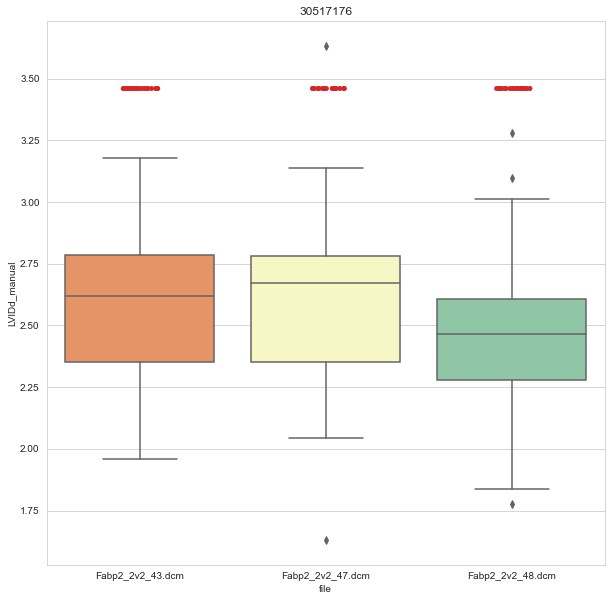

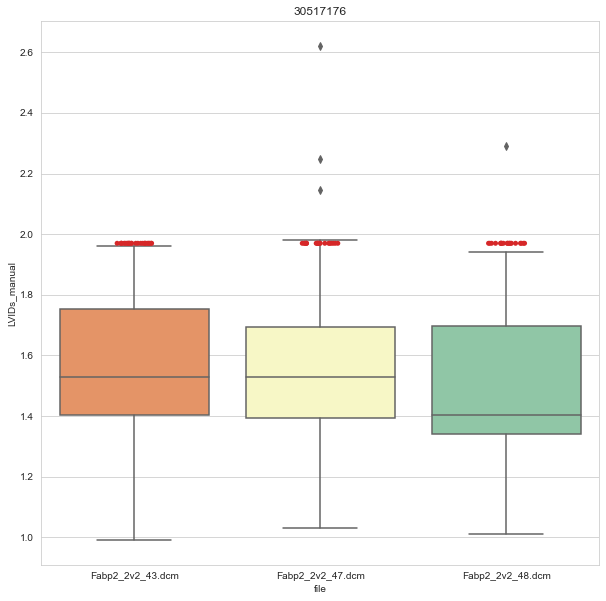

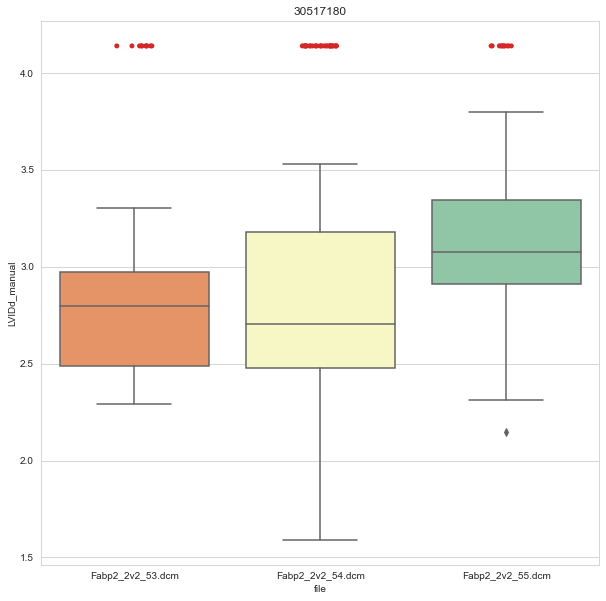

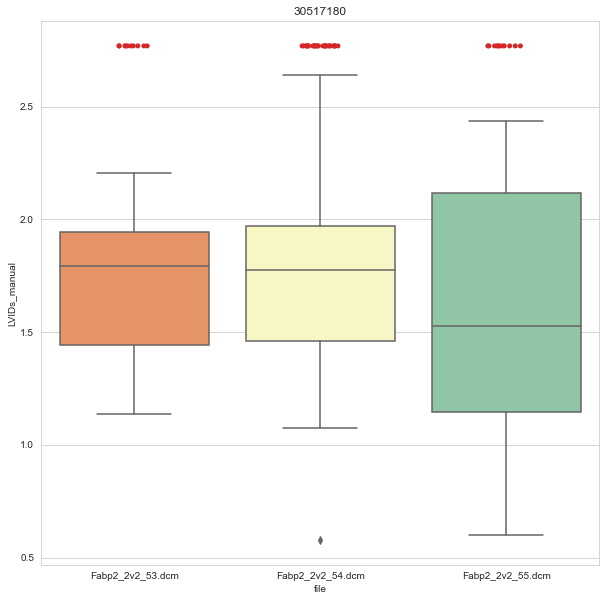

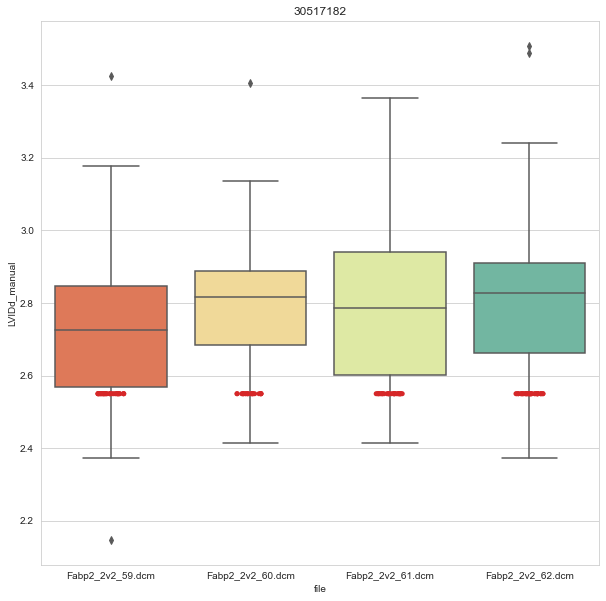

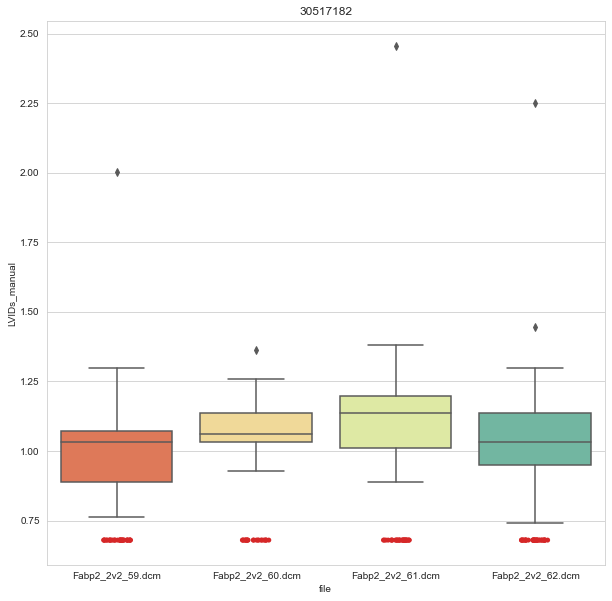

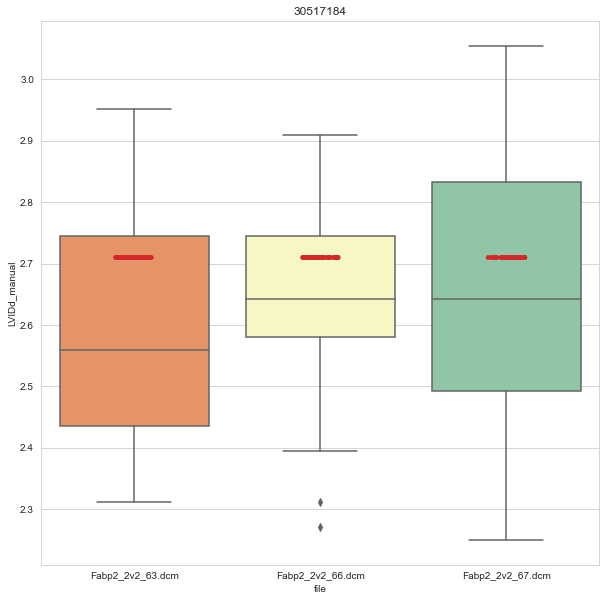

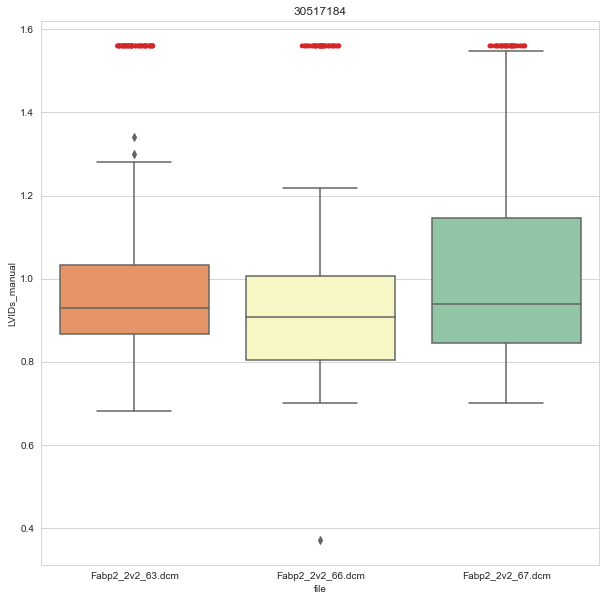

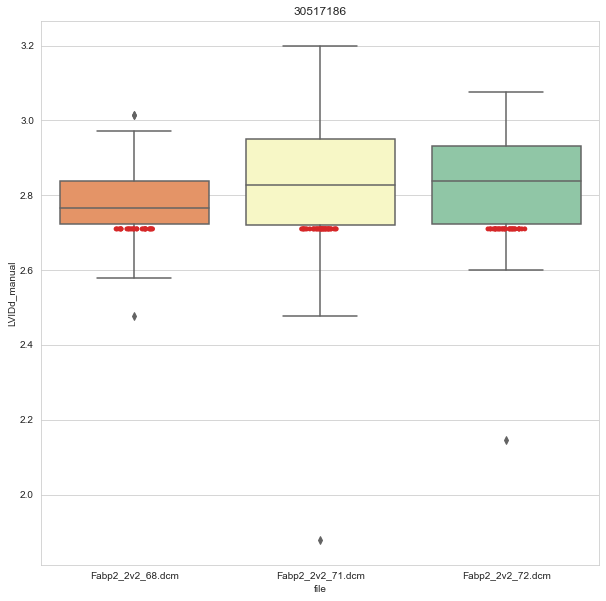

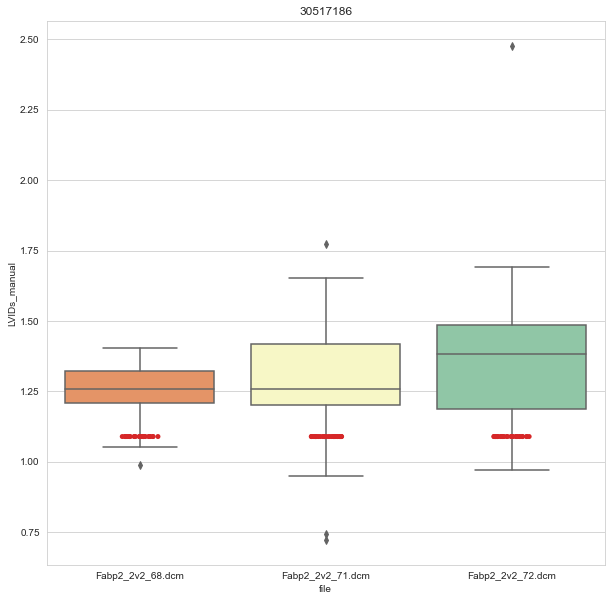

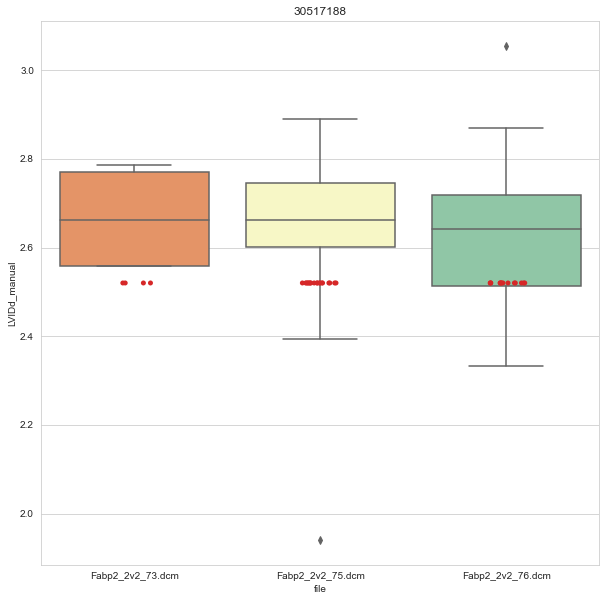

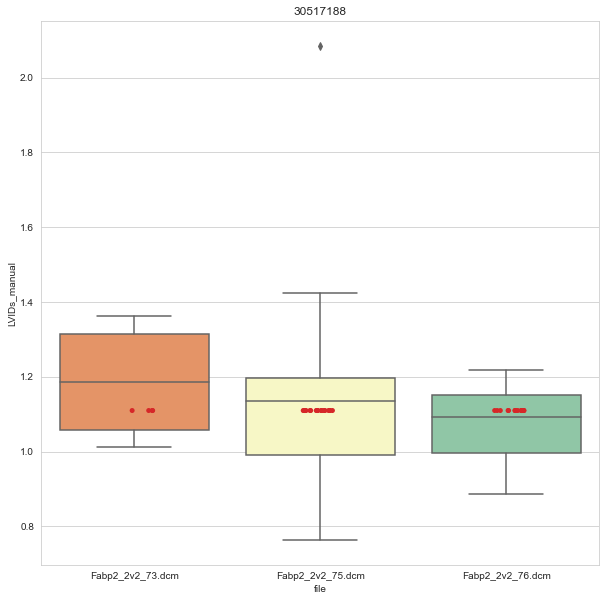

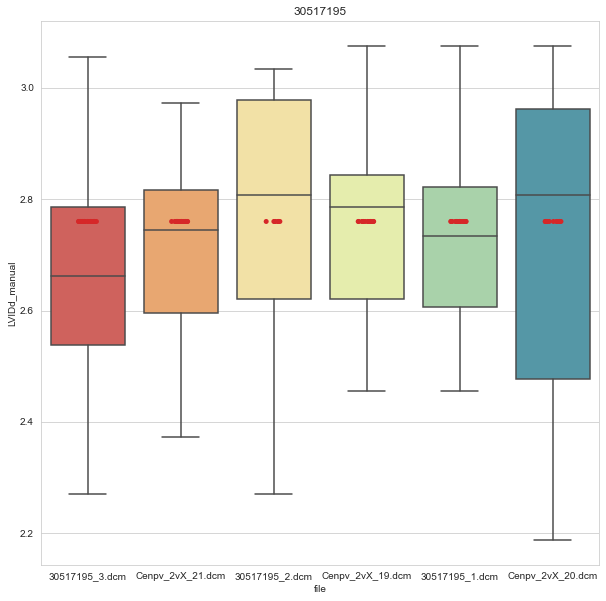

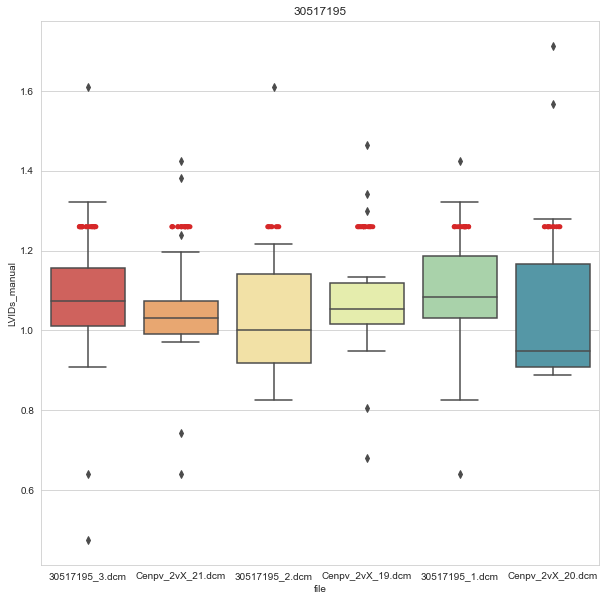

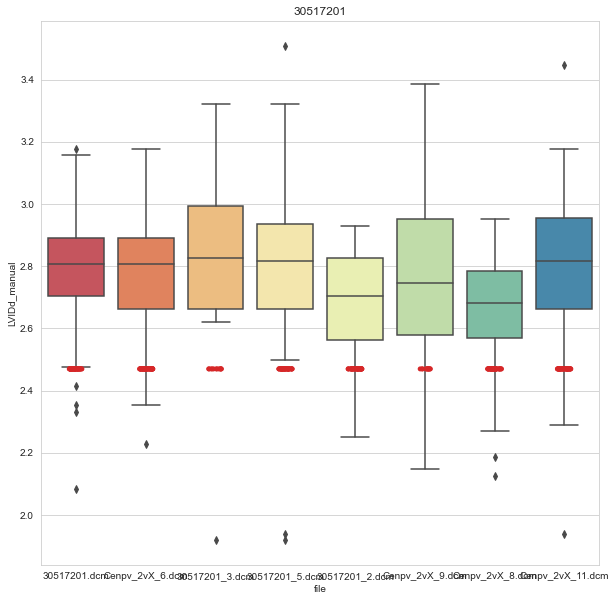

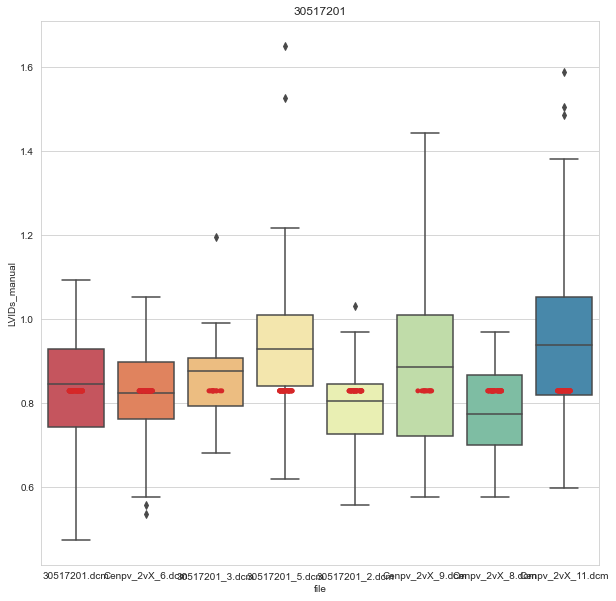

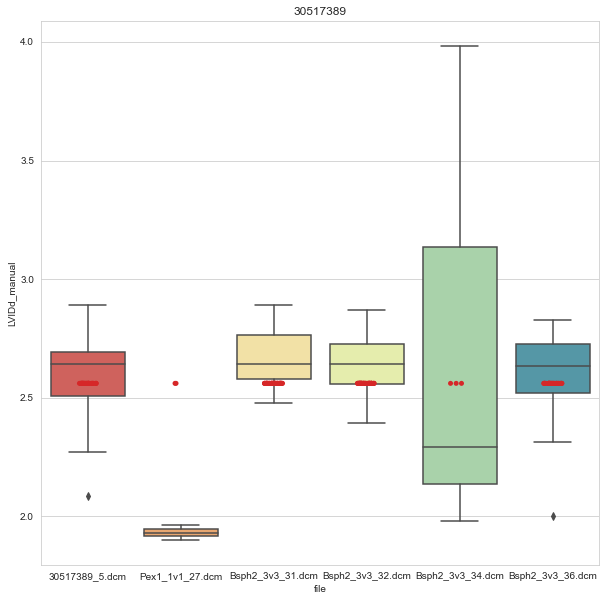

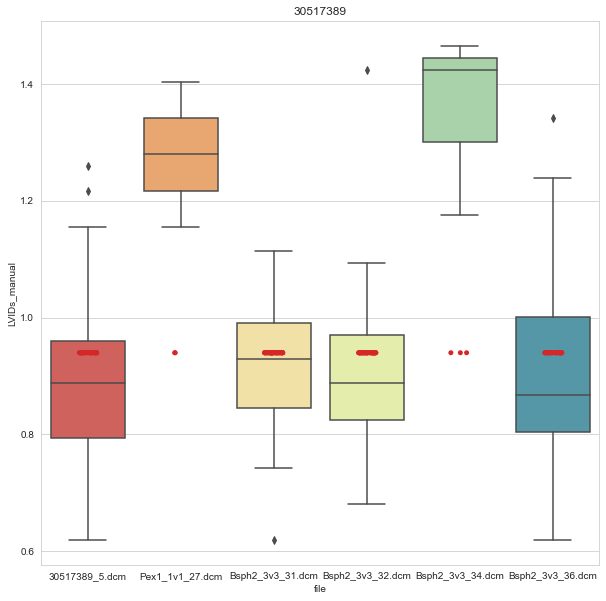

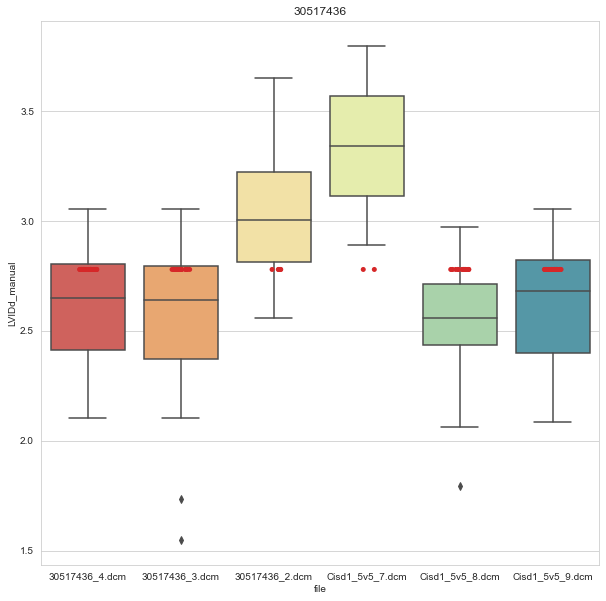

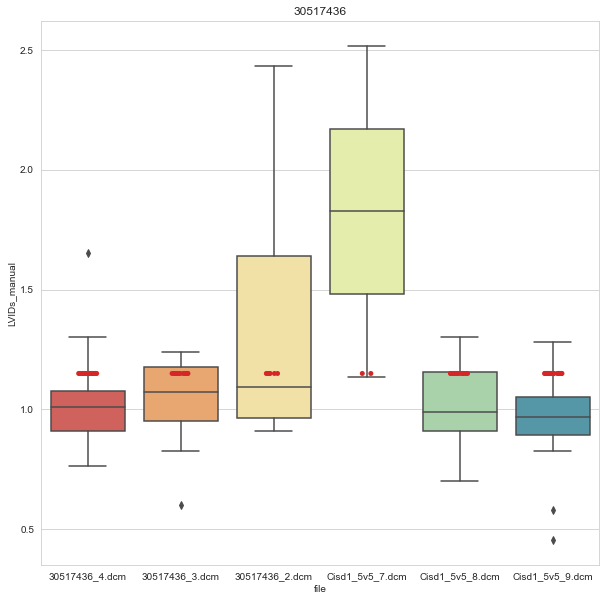

In [9]:
for mouse in mice_automatic:
    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDd_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDd_manual", color=colors2)
    plt.title(mouse)

    fig = plt.subplots(figsize= (10,10))
    sns.boxplot(data=filtered_data[filtered_data['mouse_id'] == mouse],  x="file", y="LVIDs_auto", palette=colors1)
    sns.stripplot(data= filtered_data[filtered_data['mouse_id'] == mouse], x = "file", y = "LVIDs_manual", color=colors2)
    plt.title(mouse)

## Image quality

In [10]:
image_quality = pd.read_csv("../image_quality_all_files.csv")
image_quality = image_quality[image_quality['mouse_id'].isin(mice_manual)]
image_quality

,mouse_id,file_name,high_image_quality,low_image_quality
204,30516926,Pex1_1v1_10,86.742035,13.257965
205,30516926,30516926,91.161357,8.838643
206,30516926,Bsph2_3v3_52,55.799212,44.200788
207,30516926,30516926_4,86.742035,13.257965
208,30516926,Bsph2_3v3_53,86.742035,13.257965
...,...,...,...,...
1684,30512219,30512219,10.587631,89.412369
1685,30512219,Kansl1l,10.587631,89.412369
1686,30512219,Kansl1l_5,26.464543,73.535457
1687,30512219,Kansl1l_1v1_144,10.587631,89.412369


### Image quality per mouse

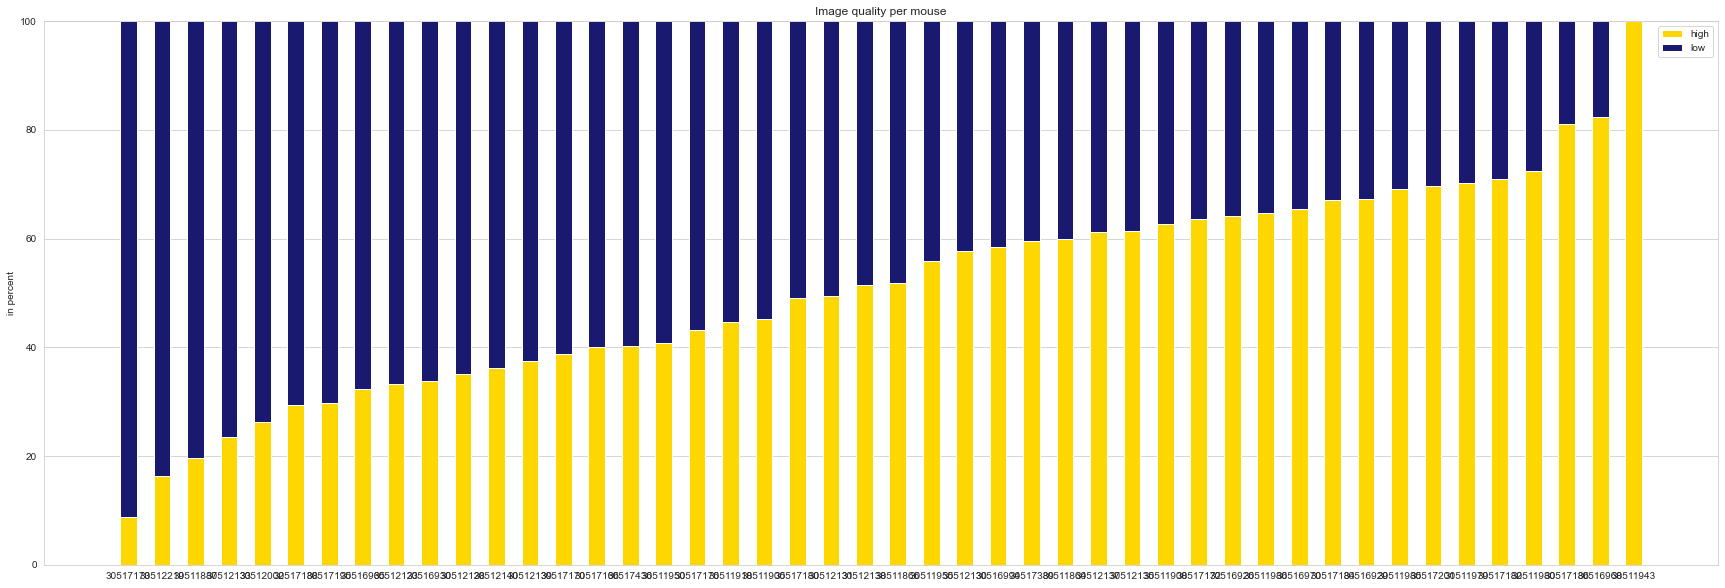

In [11]:
image_quality_mouse = image_quality.groupby(by = ['mouse_id']).mean().reset_index()
image_quality_mouse['mouse_id'] = image_quality_mouse['mouse_id'].astype(str)
image_quality_mouse.sort_values(by=['high_image_quality'], inplace = True)
labels = image_quality_mouse['mouse_id']
good_parts = image_quality_mouse['high_image_quality']
bad_parts = image_quality_mouse['low_image_quality']
width = 0.5   

fig, ax = plt.subplots(figsize=(30,10))

ax.bar(labels, good_parts, width, label='high', color='gold')
ax.bar(labels, bad_parts, width, bottom = good_parts, label='low', color='midnightblue')

ax.set_ylabel('in percent')
ax.set_title('Image quality per mouse')
ax.legend()

plt.show()

### Image quality per line

In [12]:
image_quality = pd.DataFrame([[image_quality['high_image_quality'].describe()['mean'],
                             image_quality['low_image_quality'].describe()['mean']]], 
                             index = [gene],
                             columns= ['high image quality', 'low image quality'])
image_quality = image_quality.round(2)
image_quality

,high image quality,low image quality
Fabp2,50.8,49.2


## Calculation of stats

In [13]:
# LVIDs diastole 
lvidd_stats = filtered_data[['dif_LVIDd']].describe()
lvidd_stats.rename(columns = {'dif_LVIDd': 'diff LVIDd'}, inplace=True)

In [14]:
# LVIDs systole
lvids_stats = filtered_data[['dif_LVIDs']].describe()
lvids_stats.rename(columns = {'dif_LVIDs': 'diff LVIDs'}, inplace=True)

In [15]:
# Ejection Fraction
ef_stats = filtered_data[['dif_EF']].describe()
ef_stats.rename(columns={'dif_EF':'diff ejection fraction'}, inplace=True)

In [16]:
# Fractional Shortening
fs_stats = filtered_data[['dif_FS']].describe()
fs_stats.rename(columns={'dif_FS':'diff fractional shortening'}, inplace=True)

In [17]:
stats_df = pd.concat([lvidd_stats,
                      lvids_stats,
                      ef_stats,
                      fs_stats
                     ],axis=1)
df = pd.DataFrame([[len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id'])),
                    len(np.unique(filtered_data['mouse_id']))]], 
                  index = ['number of mice'],columns= stats_df.columns)
stats_df = stats_df.append(df)
stats_df.rename(index={'count':'number of measurements'}, inplace=True)
stats_df = stats_df.round(2)
stats_df

,diff LVIDd,diff LVIDs,diff ejection fraction,diff fractional shortening
number of measurements,7205.00,7205.00,7205.00,7205.00
mean,-0.03,-0.14,1.68,3.10
std,0.34,0.34,9.35,10.96
min,-2.55,-2.31,-88.63,-59.50
25%,-0.18,-0.30,-1.50,-2.64
50%,0.00,-0.11,1.70,2.76
75%,0.17,0.04,5.08,8.53
max,2.17,1.80,47.85,51.95
number of mice,46.00,46.00,46.00,46.00


## Calculating p-values with manually annotated data

In [18]:
# Creation of subgroups
f_man = manual[manual['sex'] == 'f']
m_man = manual[manual['sex'] == 'm']

In [19]:
# LVIDs systole
_, f_man_LVIDs = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDs_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDs = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDs_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDs = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDs_manual'], manual[manual['genotype'] == 'mutant']['LVIDs_manual'], alternative='two-sided', use_continuity=True)

# LVIDs diastole
_, f_man_LVIDd = mannwhitneyu(f_man[f_man['genotype'] == 'control']['LVIDd_manual'], f_man[f_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, m_man_LVIDd = mannwhitneyu(m_man[m_man['genotype'] == 'control']['LVIDd_manual'], m_man[m_man['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)
_, man_LVIDd = mannwhitneyu(manual[manual['genotype'] == 'control']['LVIDd_manual'], manual[manual['genotype'] == 'mutant']['LVIDd_manual'], alternative='two-sided', use_continuity=True)

# Ejection fraction
_, f_man_ef = mannwhitneyu(f_man[f_man['genotype'] == 'control']['EF_manual'], f_man[f_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, m_man_ef = mannwhitneyu(m_man[m_man['genotype'] == 'control']['EF_manual'], m_man[m_man['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)
_, man_ef = mannwhitneyu(manual[manual['genotype'] == 'control']['EF_manual'], manual[manual['genotype'] == 'mutant']['EF_manual'], alternative='two-sided', use_continuity=True)

#Fractional shortening
_, f_man_fs= mannwhitneyu(f_man[f_man['genotype'] == 'control']['FS_manual'], f_man[f_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, m_man_fs= mannwhitneyu(m_man[m_man['genotype'] == 'control']['FS_manual'], m_man[m_man['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)
_, man_fs= mannwhitneyu(manual[manual['genotype'] == 'control']['FS_manual'], manual[manual['genotype'] == 'mutant']['FS_manual'], alternative='two-sided', use_continuity=True)

## Calculating p-values with automatically annotated data

### Creation of subgroups

In [20]:
means_auto = filtered_data.groupby(by = ['mouse_id', 'sex', 'genotype', 'type']).mean().reset_index()
means_auto_f = means_auto[means_auto['sex'] == 'f']
means_auto_m = means_auto[means_auto['sex'] == 'm']

### Wilcoxn-Rank-Sum-Test

In [21]:
# LVIDs systole
_, p_f_auto_LVIDs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDs_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDs_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDs_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDs_auto'], alternative='two-sided', use_continuity=True)

In [22]:
# LVIDs diastole
_, p_f_auto_LVIDd = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['LVIDd_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_LVIDd = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['LVIDd_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_LVIDd = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['LVIDd_auto'], means_auto[means_auto['genotype'] == 'mutant']['LVIDd_auto'], alternative='two-sided', use_continuity=True)

In [23]:
# Ejection fraction
_, p_f_auto_ef = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['EF_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_ef = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['EF_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_ef = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['EF_auto'], means_auto[means_auto['genotype'] == 'mutant']['EF_auto'], alternative='two-sided', use_continuity=True)

In [24]:
# Fractional shortening
_, p_f_auto_fs = mannwhitneyu(means_auto_f[means_auto_f['genotype'] == 'control']['FS_auto'], means_auto_f[means_auto_f['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_m_auto_fs = mannwhitneyu(means_auto_m[means_auto_m['genotype'] == 'control']['FS_auto'], means_auto_m[means_auto_m['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)
_, p_auto_fs = mannwhitneyu(means_auto[means_auto['genotype'] == 'control']['FS_auto'], means_auto[means_auto['genotype'] == 'mutant']['FS_auto'], alternative='two-sided', use_continuity=True)

In [25]:
p_values = pd.DataFrame([[f_man_LVIDs, p_f_auto_LVIDs, m_man_LVIDs, p_m_auto_LVIDs ],
                         [f_man_LVIDd, p_f_auto_LVIDd, m_man_LVIDd, p_m_auto_LVIDd ],
                         [f_man_ef   , p_f_auto_ef   , m_man_ef   , p_m_auto_ef    ],
                         [f_man_fs   , p_f_auto_fs   , m_man_fs   , p_m_auto_fs    ]],
                        index = ['LVIDs', 'LVIDd', 'ejection fraction', 'fractional shortening'],
                        columns = ['f manual', 'f automatic', 'm manual', 'm automatic'])

In [26]:
p_values.round(3)

,f manual,f automatic,m manual,m automatic
LVIDs,0.154,0.087,0.284,0.241
LVIDd,0.018,0.019,0.500,0.485
ejection fraction,0.236,0.147,0.351,0.351
fractional shortening,0.280,0.236,0.393,0.275


In [27]:
num_stats = pd.DataFrame(
    [[len(f_man[f_man['genotype'] == 'control']),
      len(means_auto_f[means_auto_f['genotype'] == 'control']),
      len(f_man[f_man['genotype'] == 'mutant']),
      len(means_auto_f[means_auto_f['genotype'] == 'mutant'])],
     [len(m_man[m_man['genotype'] == 'control']),
      len(means_auto_m[means_auto_m['genotype'] == 'control']),
      len(m_man[m_man['genotype'] == 'mutant']),
      len(means_auto_m[means_auto_m['genotype'] == 'mutant'])
    ]],
    index = ['f', 'm'], 
    columns = ['man con', 'auto con', 'man mut', 'auto mut']
)
num_stats

,man con,auto con,man mut,auto mut
f,16,16,10,10
m,13,13,7,7


In [28]:
image_quality.to_csv(gene + '_image_quality_per_line.csv')
num_stats.to_csv(gene + '_number_of_mice.csv')
p_values.to_csv(gene + '_p_values.csv')

In [29]:
def color_p_values(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'coral' if val < 0.05 else ''
    return 'background-color: %s' % color

In [30]:
analysis_overview = p_values.style.applymap(color_p_values).format("{:1.3f}")
analysis_overview

,f manual,f automatic,m manual,m automatic
LVIDs,0.154,0.087,0.284,0.241
LVIDd,0.018,0.019,0.500,0.485
ejection fraction,0.236,0.147,0.351,0.351
fractional shortening,0.280,0.236,0.393,0.275
